In [2]:
! pip install statsmodels
import statsmodels.api as sm
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import linregress
plt.style.use('ggplot')

#source= "https://perspective.usherbrooke.ca/bilan/servlet/BilanEssai?codeStat=SP.POP.IDH.IN"

In [23]:
# Nombre d'habitants

base_90 = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KSV", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Kosovo", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'NH' : ["10694796", "39877570", "3286542", "25518074", "79433029", "11828638", "16004763", "32637657", "3556539", "17065128", "7677850", "7175200", "517418", "107147651", "10189348", "9967379", "5133419", "558442", "7096194", "4494310", "1341474", "150706446", "8718289", "9131361", "5483793", "8910808", "11430520", "27691138", "364563", "2809221", "13342868", "1135185000", "788500", "32601393", "431119", "2385435", "35987541", "20799523", "42869283", "3158253", "11910540", "4777368", "10626680", "5140939", "577173", "7129004", "57214630", "1900151", "10449837", "2149960", "38867322", "1569174", "854011", "249623000", "47878073", "4986431", "58044701", "983028", "1040616", "4802000", "15446982", "10196792", "9050115", "6354145", "465549", "973551", "747116", "6925331", "5053234", "10373988", "870452165", "182159874", "17658381", "55793629", "3513974", "254826", "4660000", "56719240", "2392030", "123478000", "3480587", "16348000", "23162269", "4391200", "1862000", "1674938", "4314443", "1798997", "2663151", "3593700", "2209731", "4236983", "3697838", "381850", "2044174", "11882762", "17517054", "9539665", "8945026", "24570814", "1058775", "2006027", "81720428", "2965978", "2161433", "606372", "13303459", "40099553", "1369011", "19616530", "4227820", "8370648", "95214257", "4241473", "3329800", "1804524", "17586630", "20510000", "115414069", "2449968", "3864972", "4059195", "14951510", "22109099", "61558898", "38110782", "9983218", "441675", "23201835", "57247586", "147969407", "7319962", "5367179", "7536001", "7586000", "4325388", "3047132", "5299187", "1998161", "6999096", "21090886", "4750817", "17204094", "8558835", "6715519", "412756", "12408996", "5417860", "26206012", "5827069", "10333355", "55228410", "3875947", "1266518", "8440023", "3720278", "54324142", "51891400", "3117012", "19750579", "66912613", "13375121", "7686401", "10113893"]}
base_95 = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KSV", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Kosovo", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'NH' : ["16418912", "43986084", "3187784", "28478022", "81678051", "13912253", "18888857", "34946110", "3322782", "18004882", "7948278", "7684850", "612934", "117793338", "10193831", "10136811", "6046511", "527536", "7841471", "3750527", "1543634", "163515328", "8406067", "10353263", "5932783", "10919528", "13211647", "29302311", "411382", "3276706", "14416796", "1204855000", "862418", "35970101", "483760", "2742309", "43285791", "22385536", "45092991", "3572856", "14299727", "4620030", "10926703", "5233373", "629619", "7869753", "64166908", "2433988", "11561683", "2157220", "39724050", "1436634", "953573", "266278000", "57476536", "5107790", "59543659", "1121964", "1242155", "4657722", "17438874", "10562153", "10286786", "7468347", "560740", "1117222", "751689", "7627316", "5812832", "10328965", "964279129", "198140162", "20948858", "60794809", "3608841", "267468", "5545000", "56844303", "2509372", "125472000", "4458195", "15816243", "26878347", "4560400", "2029000", "1655222", "4927432", "1934079", "2485056", "3959640", "2142422", "4733063", "3629102", "408625", "1983964", "13869138", "20136888", "10112816", "9921094", "26599048", "1122457", "2380341", "89969572", "2953200", "2330334", "611712", "15594830", "42880186", "1605370", "22305571", "4721929", "9813918", "108187610", "4359184", "3673400", "2172672", "20680831", "22785000", "133117476", "2716067", "4616439", "4603917", "15459006", "24449055", "69250468", "38594998", "10026176", "515133", "22684270", "58019030", "148375787", "5686897", "5748195", "8632681", "7625357", "4324149", "3524506", "5361999", "1989872", "7210930", "23290602", "5302042", "18177572", "8826939", "7040687", "434490", "14313450", "5916173", "30560071", "6888856", "10327253", "59424834", "4279566", "1307822", "9294102", "4226623", "59305490", "51512800", "3208300", "22107286", "73759110", "16103339", "8684135", "10994041"]}
base_00 = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KSV", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Kosovo", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'NH' : ["19542982", "46813266", "3089027", "30774621", "82211508", "16394062", "21547390", "37070774", "3168523", "19028802", "8011566", "8048600", "711442", "129193327", "9979610", "10251250", "6998023", "587207", "8592656", "4179350", "1726985", "175873720", "8170172", "11882888", "6307659", "12118841", "15091594", "30685730", "458251", "3759170", "15351799", "1262645000", "948237", "39215135", "536758", "3134030", "48616317", "23367059", "47008111", "3979193", "16799670", "4468302", "11105791", "5339616", "742033", "8540791", "71371371", "3275333", "12626507", "2392880", "40567864", "1396985", "1030496", "282162411", "67031867", "5176209", "60921384", "1272935", "1437539", "4077131", "19665502", "10805808", "11589761", "8336967", "684977", "1230849", "759051", "8360225", "6656725", "10210971", "1059633675", "214072421", "24628858", "65544383", "3805174", "281205", "6289000", "56942108", "2612205", "126843000", "5056174", "14883626", "30851606", "4898400", "1700000", "1934901", "5430853", "1998630", "2367550", "4320642", "2895224", "5154790", "3499536", "436300", "2026350", "16216431", "22945150", "11229387", "11239101", "28554415", "1186873", "2695003", "97873442", "2924668", "2450979", "604950", "17768505", "45538332", "1819141", "24559500", "5123222", "11622665", "122851984", "4490967", "3857700", "2344253", "24020697", "24650400", "154369924", "3001731", "5508297", "5123819", "15925513", "26654439", "77958223", "38258629", "10289898", "645937", "22442971", "58892514", "146596869", "8109989", "5958482", "9704287", "7516346", "4584067", "4027887", "5388720", "1988925", "8721465", "26298773", "6114440", "18776371", "8872109", "7184250", "478998", "16307654", "6272998", "34463704", "8259137", "10255063", "63066603", "5008035", "1332203", "9893316", "4569132", "64113547", "49176500", "3292224", "24427729", "79001142", "18628700", "9891136", "11834676"]}
base_05 = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KSV", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Kosovo", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'NH' : ["24411191", "49017147", "3011487", "32956690", "82469422", "19450959", "24397644", "39070501", "3047246", "20176844", "8227829", "8391850", "901921", "140912590", "9663915", "10478617", "8149419", "663323", "9377388", "4094297", "1892807", "186797334", "7658972", "13876127", "7388874", "13246583", "17275171", "32243753", "492827", "4208834", "16175311", "1303720000", "1037062", "42220940", "592683", "3672839", "56550247", "24100982", "48184561", "4315887", "18970215", "4310145", "11246114", "5419432", "830861", "9164768", "79075310", "4280993", "13770012", "2831732", "43653155", "1354775", "1071886", "295516599", "77469940", "5246096", "63188395", "1458353", "1660368", "3902469", "22496951", "10987314", "12948292", "9140114", "864726", "1379713", "759709", "9111900", "7564613", "10087065", "1154638713", "228805144", "28698684", "70182594", "4159914", "296734", "6930100", "57969484", "2676863", "127773000", "5678534", "15147029", "35843010", "5162600", "1705780", "2235403", "5852970", "1977424", "2238799", "4643044", "3266318", "5837986", "3322528", "465158", "2036855", "18792171", "25923536", "12755648", "13180551", "30431902", "1228254", "3012360", "105442402", "2888985", "2559255", "614261", "20211114", "47724471", "1962865", "26285110", "5454678", "13855221", "140490722", "4623291", "4133900", "2515192", "27946588", "26167000", "174372098", "3305868", "6498818", "5476878", "16319868", "28147267", "86261250", "38165445", "10503330", "848710", "21319685", "60401206", "143518814", "9026299", "6037817", "10974057", "7440769", "5683334", "4265762", "5372807", "2000474", "10467292", "29540577", "7662654", "19673866", "9029572", "7437115", "516220", "18583557", "6929145", "39439505", "10005012", "10211216", "65821360", "5711597", "1369075", "10388344", "4885775", "68704715", "47105171", "3317665", "26668785", "83142095", "21320671", "11564870", "12224753"]}

NH_90 = pd.DataFrame(base_90)
NH_95 = pd.DataFrame(base_95)
NH_00 = pd.DataFrame(base_00)
NH_05 = pd.DataFrame(base_05)

In [4]:
#IDH

base_90 = {'code' : ["ZAF", "ALB", "DZA", "DEU", "SAU", "ARG", "ARM", "AUS", "AUT", "BHR", "BGD", "BEL", "BEN", "BOL", "BWA", "BRA", "BGR", "BDI", "KHM", "CMR", "CAN", "CAF", "CHL", "CHN", "CYP", "COL", "COG", "COD", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DOM", "EGY", "ARE", "ECU", "ESP", "EST", "SWZ", "USA", "FIN", "FRA", "GAB", "GMB", "GHA", "GRC", "GTM", "GIN", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "LAO", "LSO", "LVA", "LBY", "LTU", "LUX", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NOR", "NZL", "UGA", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SDN", "LKA", "SWE", "CHE", "TJK", "TZA", "CZE", "THA", "TGO", "TTO", "TUN", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Bahreïn", "Bangladesh", "Belgique", "Bénin ", "Bolivie", "Botswana", "Brésil", "Bulgarie", "Burundi", "Cambodge", "Cameroun", "Canada", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Congo", "Congo (rep. dem.)", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Espagne", "Estonie", "Eswatini", "États-Unis", "Finlande", "France", "Gabon", "Gambie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Laos", "Lesotho", "Lettonie", "Libye", "Lituanie", "Luxembourg", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Norvège", "Nouvelle-Zélande", "Ouganda", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Tadjikistan", "Tanzanie", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'IDH' : ["0.618", "0.645", "0.577", "0.801", "0.697", "0.704", "0.631", "0.866", "0.795", "0.746", "0.387", "0.806", "0.348", "0.536", "0.581", "0.611", "0.694", "0.297", "0.364", "0.44", "0.849", "0.317", "0.701", "0.502", "0.732", "0.592", "0.536", "0.356", "0.728", "0.656", "0.388", "0.67", "0.676", "0.799", "0.598", "0.546", "0.727", "0.643", "0.754", "0.733", "0.536", "0.86", "0.784", "0.779", "0.62", "0.333", "0.455", "0.753", "0.478", "0.276", "0.538", "0.409", "0.506", "0.704", "0.427", "0.528", "0.572", "0.577", "0.763", "0.802", "0.792", "0.769", "0.638", "0.816", "0.617", "0.69", "0.468", "0.618", "0.4", "0.499", "0.704", "0.677", "0.732", "0.782", "0.643", "0.34", "0.231", "0.458", "0.619", "0.374", "0.65", "0.651", "0.579", "0.209", "0.359", "0.579", "0.378", "0.489", "0.21", "0.85", "0.818", "0.311", "0.404", "0.66", "0.38", "0.58", "0.829", "0.611", "0.586", "0.712", "0.711", "0.754", "0.701", "0.775", "0.734", "0.25", "0.529", "0.367", "0.718", "0.275", "0.718", "0.739", "0.767", "0.331", "0.625", "0.816", "0.832", "0.623", "0.37", "0.73", "0.574", "0.405", "0.672", "0.569", "0.579", "0.705", "0.692", "0.634", "0.475", "0.399", "0.401", "0.491"]}
base_95 = {'code' : ["ZAF", "ALB", "DZA", "DEU", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BOL", "BWA", "BRA", "BGR", "BDI", "KHM", "CMR", "CAN", "CAF", "CHL", "CHN", "CYP", "COL", "COG", "COD", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ESP", "EST", "SWZ", "USA", "FIN", "FRA", "GAB", "GMB", "GHA", "GRC", "GTM", "GIN", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "LAO", "LSO", "LVA", "LBY", "LTU", "LUX", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NOR", "NZL", "UGA", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SDN", "LKA", "SWE", "CHE", "SYR", "TJK", "TZA", "CZE", "THA", "TGO", "TTO", "TUN", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bolivie", "Botswana", "Brésil", "Bulgarie", "Burundi", "Cambodge", "Cameroun", "Canada", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Congo", "Congo (rep. dem.)", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Espagne", "Estonie", "Eswatini", "États-Unis", "Finlande", "France", "Gabon", "Gambie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Laos", "Lesotho", "Lettonie", "Libye", "Lituanie", "Luxembourg", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Norvège", "Nouvelle-Zélande", "Ouganda", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Syrie", "Tadjikistan", "Tanzanie", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'IDH' : ["0.649", "0.632", "0.6", "0.834", "0.722", "0.731", "0.605", "0.883", "0.817", "0.612", "0.775", "0.425", "0.657", "0.852", "0.373", "0.571", "0.577", "0.648", "0.696", "0.296", "0.387", "0.422", "0.861", "0.303", "0.727", "0.55", "0.786", "0.625", "0.507", "0.333", "0.778", "0.687", "0.387", "0.696", "0.654", "0.831", "0.355", "0.629", "0.576", "0.764", "0.662", "0.8", "0.727", "0.52", "0.877", "0.816", "0.825", "0.632", "0.353", "0.473", "0.768", "0.507", "0.295", "0.578", "0.418", "0.529", "0.741", "0.46", "0.564", "0.553", "0.64", "0.795", "0.826", "0.823", "0.8", "0.657", "0.84", "0.684", "0.664", "0.456", "0.563", "0.428", "0.492", "0.673", "0.704", "0.703", "0.808", "0.683", "0.398", "0.262", "0.489", "0.648", "0.418", "0.669", "0.594", "0.555", "0.229", "0.398", "0.588", "0.41", "0.524", "0.229", "0.883", "0.851", "0.321", "0.428", "0.688", "0.425", "0.606", "0.861", "0.643", "0.598", "0.74", "0.76", "0.784", "0.687", "0.839", "0.7", "0.234", "0.577", "0.368", "0.695", "0.274", "0.773", "0.751", "0.782", "0.366", "0.65", "0.856", "0.848", "0.579", "0.55", "0.371", "0.753", "0.611", "0.409", "0.683", "0.607", "0.607", "0.664", "0.711", "0.658", "0.529", "0.415", "0.412", "0.467"]}
base_00 = {'code' : ["ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COG", "COD", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "LAO", "LSO", "LVA", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SDN", "LKA", "SWE", "CHE", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TMP", "TGO", "TTO", "TUN", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Congo", "Congo (rep. dem.)", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Laos", "Lesotho", "Lettonie", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Timor oriental", "Togo", "Trinité-et-Tobago", "Tunisie", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'IDH' : ["0.63", "0.669", "0.644", "0.868", "0.387", "0.743", "0.771", "0.647", "0.898", "0.838", "0.64", "0.792", "0.468", "0.683", "0.873", "0.398", "0.608", "0.672", "0.565", "0.684", "0.712", "0.286", "0.303", "0.42", "0.431", "0.867", "0.57", "0.309", "0.759", "0.594", "0.802", "0.653", "0.49", "0.333", "0.817", "0.711", "0.394", "0.75", "0.686", "0.863", "0.363", "0.657", "0.611", "0.798", "0.67", "0.825", "0.78", "0.471", "0.885", "0.283", "0.858", "0.849", "0.633", "0.385", "0.673", "0.484", "0.796", "0.546", "0.329", "0.516", "0.604", "0.442", "0.554", "0.769", "0.493", "0.606", "0.607", "0.67", "0.857", "0.86", "0.853", "0.83", "0.662", "0.855", "0.702", "0.685", "0.451", "0.594", "0.466", "0.467", "0.728", "0.387", "0.727", "0.756", "0.855", "0.669", "0.456", "0.725", "0.399", "0.308", "0.53", "0.673", "0.442", "0.702", "0.597", "0.589", "0.298", "0.431", "0.558", "0.446", "0.57", "0.252", "0.917", "0.869", "0.704", "0.398", "0.595", "0.45", "0.719", "0.449", "0.624", "0.876", "0.678", "0.624", "0.785", "0.785", "0.81", "0.709", "0.867", "0.72", "0.335", "0.615", "0.38", "0.711", "0.284", "0.819", "0.764", "0.825", "0.402", "0.685", "0.897", "0.889", "0.59", "0.55", "0.395", "0.299", "0.796", "0.649", "0.507", "0.425", "0.716", "0.653", "0.655", "0.671", "0.742", "0.672", "0.579", "0.443", "0.432", "0.44"]}
base_05 = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SDN", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TMP", "TGO", "TTO", "TUN", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Timor oriental", "Togo", "Trinité-et-Tobago", "Tunisie", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'IDH' : ["0.408", "0.614", "0.704", "0.692", "0.903", "0.455", "0.77", "0.782", "0.693", "0.908", "0.855", "0.679", "0.791", "0.505", "0.725", "0.889", "0.44", "0.51", "0.624", "0.7", "0.596", "0.7", "0.75", "0.324", "0.33", "0.49", "0.466", "0.892", "0.598", "0.319", "0.788", "0.647", "0.831", "0.683", "0.455", "0.5", "0.364", "0.855", "0.728", "0.413", "0.783", "0.731", "0.903", "0.405", "0.675", "0.634", "0.825", "0.693", "0.408", "0.844", "0.825", "0.48", "0.898", "0.346", "0.895", "0.869", "0.647", "0.416", "0.712", "0.509", "0.845", "0.571", "0.371", "0.567", "0.396", "0.614", "0.453", "0.58", "0.804", "0.535", "0.632", "0.631", "0.695", "0.896", "0.889", "0.872", "0.857", "0.695", "0.873", "0.729", "0.747", "0.49", "0.616", "0.506", "0.461", "0.802", "0.732", "0.378", "0.747", "0.809", "0.878", "0.702", "0.479", "0.731", "0.38", "0.363", "0.58", "0.713", "0.466", "0.728", "0.648", "0.65", "0.753", "0.357", "0.477", "0.556", "0.475", "0.596", "0.283", "0.465", "0.932", "0.888", "0.748", "0.437", "0.628", "0.5", "0.739", "0.479", "0.649", "0.891", "0.698", "0.65", "0.808", "0.8", "0.831", "0.755", "0.891", "0.752", "0.408", "0.651", "0.422", "0.742", "0.342", "0.868", "0.794", "0.861", "0.436", "0.718", "0.899", "0.905", "0.676", "0.635", "0.593", "0.448", "0.33", "0.835", "0.693", "0.496", "0.436", "0.752", "0.689", "0.69", "0.715", "0.756", "0.714", "0.616", "0.474", "0.48", "0.43"]}

IDH_90 = pd.DataFrame(base_90)
IDH_95 = pd.DataFrame(base_95)
IDH_00 = pd.DataFrame(base_00)
IDH_05 = pd.DataFrame(base_05)

In [5]:
#PIB

base_90_ = {'code' : ["ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BWA", "BRA", "BGR", "BFA", "BDI", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "KOR", "CRI", "CIV", "CUB", "DNK", "DOM", "EGY", "ARE", "ECU", "ESP", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "LAO", "LSO", "LBN", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MNG", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "SLE", "SGP", "SVN", "SDN", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Cuba", "Danemark", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Espagne", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Laos", "Lesotho", "Liban", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Mongolie", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Sierra Leone", "Singapour", "Slovénie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'PIB' : ["185160422891.73", "5279160805.7599", "80470629590.902", "2342139255489.1", "27672785901.198", "284225946006.84", "265817211205.31", "5839777093.9512", "629485671230.82", "240629049863.28", "20240091907.577", "9006118309.7132", "52833978753.318", "29452716336.868", "293456205020.66", "3958255490.5212", "417287990.10159", "11974420933.741", "5274313873.0868", "917211118074.91", "38630990310.869", "3042310107.504", "2385838991.8942", "15416689237.844", "877824201432.12", "313527702.86048", "1492780724.8764", "71788871549.583", "1027379269906.8", "9941392505.9974", "120488417460.91", "529042761.14912", "5627105374.1447", "29404734879.051", "401560542993.63", "18845898693.616", "22747083498.092", "52749217702.761", "202014449528", "19981325537.006", "115166183182.7", "127141173333.78", "43683854187.302", "737305660791.84", "1857308362.906", "9811054837000", "13224508680.37", "155975322164.06", "1661090955411.7", "8218372646.5867", "694740031.23116", "17028335676.156", "13167340442.708", "158313089124.38", "24741758600.277", "3528427807.3346", "173733398.0021", "652092046.81074", "1782661480.134", "11154318590.041", "8615404668.1517", "465242841651.6", "270259316976.43", "62001516291.881", "187662435784.18", "81120842271.689", "8044378650.3189", "96581241484.838", "1559247756415", "10772517032.2", "3509518031571.2", "11598569492.679", "95326487409.958", "30431959354.312", "5284729934.7335", "2736044728.3743", "966060902.39766", "9896526025.7785", "25212438894.528", "7293742777.2276", "6492398920.4867", "74627553679.509", "3377048507.1153", "4198817500.5315", "41636515790.157", "4034441844.0528", "2806313535.8059", "665614206119.01", "3826905840.8639", "2894534061.6547", "6798588278.0654", "3912561187.2961", "8253520034.4867", "5248399781.5922", "3860672838.209", "153178750575.32", "211808370362.72", "87810166843.913", "29333594829.549", "6498038178.89", "32109736976.405", "110450553630.16", "12706147933.014", "7373337464.2946", "16384218445.375", "465082446942.4", "59592279647.219", "107109108274.66", "194797367584.79", "145478331657.15", "1.24804E+11", "1767491105260.9", "1161488648465.8", "2716006537.87", "12679661440.998", "7649320651.2694", "2377124268.5196", "70914989180.441", "31023523366.178", "33608285735.427", "22720369186.692", "295881542676.81", "470515127240.66", "2670820077.1801", "11723469589.447", "7088296703.7871", "13747792168.777", "2501264393.6097", "120142052583.97", "144044991708.44", "2813622230.8257", "7589056693.8539", "17601950266.857", "13145978551.505", "288739518672.1", "161487959613.27", "25829737832.144", "234980505270.49", "45057981854.807", "23917787640.789", "6840844039.48", "16673492752.131"]}
base_95_ = {'code' : ["ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SDN", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'PIB' : ["193189961762.59", "4743489156.7434", "81507170839.2", "2583326450250.1", "23312874942.432", "337869569193.66", "348389357874.28", "3083849041.9622", "707771815356.07", "268576168421.57", "8472530910.5357", "12505919514.141", "65927662720.248", "19230536338.728", "317585194591.88", "4863513136.1772", "498208984.23188", "14637304837.904", "2942733621.7006", "6593587689.5096", "1066858840351.5", "33839848536.419", "3685636779.1288", "2100894457.9711", "4137653518.6525", "13868353888.055", "955122057570.82", "521911297.4147", "1567392310.3015", "104919125196.92", "1831415106313.3", "12661018856.403", "150011784516.03", "549132859.96193", "5753382935.618", "20181816409.899", "604747148973.98", "24537080462.903", "24468419439.984", "33753660942.426", "36587809678.547", "226658693444.8", "26116602360.55", "136218680414.95", "153043528516.18", "50573908255.363", "1633788955.2409", "794552137824.61", "10254019388.509", "2159273055.1385", "11135927079000", "13896779695.891", "152788801142.19", "1771133801947.7", "9564091413.4135", "770748583.77032", "4811445740.6596", "16238738255.143", "168432067479.95", "30509434368.802", "4271765665.3864", "352638311.564", "762199594.09194", "2512273984.6192", "9847455233.6679", "10012795187.15", "79280778283.945", "596058814158.18", "380895160090.97", "40841438912.026", "216712931669.5", "101743244089.91", "9144289754.982", "143461517687.92", "1663553589171.8", "13073366262.132", "3785636263364.4", "15697537788.504", "58532023518.931", "32929842156.667", "2678346337.3077", "55753637201.009", "3693284750.7278", "1252351697.648", "12350288663.54", "21951290517.483", "17913320835.873", "30604417464.514", "5747928135.676", "6386837686.0725", "117335045630.59", "3910634175.5707", "4906876185.2651", "45380875814.103", "5121487228.2903", "3279935160.7882", "724231953186.78", "4465702631.5117", "3335782058.8671", "3385008953.5244", "9028081640.2049", "4718971067.4242", "10627560511.46", "5732876300.8028", "4104613431.7187", "154601400725.05", "254491515965.69", "102833295559.55", "39015009844.355", "9118233745.0183", "26042595588.105", "138480552374.07", "16601885651.02", "11134194181.005", "20358106834.235", "520918165020.58", "76917830598.966", "119491847406.03", "217229871335.72", "158303123479.6", "1.1115E+11", "1915167807814.5", "721498966070.73", "1732981333.9799", "15980263628.18", "8501672122.8421", "24045674132", "1801942657.7783", "107074136708.31", "40440791791.708", "26417686104.921", "43113166848.932", "29548935121.174", "305836832131.49", "473591186505.17", "2656751726.8453", "17368943353.683", "2694139926.1858", "15026723409.87", "2755538900.4464", "115863001168.76", "213636116013.33", "2824474097.6868", "9200334945.9747", "21277892816.893", "8306729733.4476", "338182356112.36", "77156389639.688", "31329539981.178", "278362390881.43", "66835362482.485", "32264866157.434", "6747775256.593", "17699780558.608"]}
base_00_ = {'code' : ["ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KSV", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SDN", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Kosovo", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'PIB' : ["221691970228.1", "6057218861.9668", "96577839449.282", "2835481139992.4", "31304495235.145", "366706667600.6", "395646066535.88", "3959424772.6573", "872633840587.07", "311192381028.41", "11918436828.164", "15447922937.53", "83463768029.517", "26115912675.504", "365711203833.05", "6219354272.8382", "655103005.43161", "17334777888.126", "10676417585.11", "8491986059.0257", "1186419100700", "30403689584.751", "5107828181.2008", "1955416620.3026", "5914027156.7831", "17168567484.575", "1163199674646.8", "923550525.28989", "1675850364.8883", "131243743560.35", "2770112908910.8", "15533967406.41", "157016818948.02", "645253636.5113", "6482395852.4726", "16528062516.726", "798929132744.3", "30425018595.58", "30406072179.255", "39663399792.075", "45683563278.6", "262932986641.73", "35659263104.803", "179683172291.85", "200410321457.91", "53379221434.282", "1899038769.4514", "971112252648.44", "13914164835.082", "2484984348.5567", "13754300444000", "17352574603.758", "196097527314.84", "2046499571261.2", "9689372094.8262", "960226283.31182", "6386953178.4984", "20062001863.845", "201449666605.47", "37033784129.525", "5176459962.8875", "2699948863.6347", "693736418.9893", "2875468427.0782", "11150259243.788", "11770779974.659", "91568886542.024", "800534479628.93", "395012382598.14", "101918843143.26", "257439277645.82", "159529230641.85", "11859726687.767", "184401815445.31", "1842128690356.2", "12852232022.937", "3986755544464.2", "18380669691.802", "66179326672.508", "36630908098.826", "3518703232.6435", "3256044505", "61264410751.244", "4981660296.6084", "1453365292.3042", "15922572893.818", "25798443405.565", "2210291803.5902", "57579674356.416", "22478991899.592", "40369840661.379", "6653275727.5412", "7688842733.2774", "148271359064.95", "4736773940.2241", "6257621170.9823", "56160912155.757", "6730791855.5957", "3409611140.1232", "945027050970.19", "3939799325.0977", "3817248910.663", "2994635236", "5210292403.5968", "13564035598.32", "5607973667.3303", "13432367249.102", "7324795490.5277", "4522117708.5031", "179675448843.37", "304696827529.19", "118917293537.2", "46776462902.878", "12220817656.197", "31472652293.577", "162552194688.57", "21076793605.636", "11016425270.695", "20783433276.255", "644297559542.72", "87409379264.711", "142796015298.76", "280975991510.81", "193398953419.57", "33690629183.426", "1.09896E+11", "2292005659330.5", "780432873752.84", "2738431416.3043", "17621447036.172", "10450471990.972", "25599017869", "1836372354.8896", "140533304238.72", "48038277837.884", "32301448497.086", "61791930763.878", "37777691762.362", "364795858131.68", "529837997852.03", "2920960063.8705", "20772425375.115", "2699528255.2936", "18486481203.178", "3133116396.5601", "126265440317.09", "221454615181.94", "3492824711.1678", "13233198283.713", "27972151924.287", "10334005228.002", "413825489994.34", "69836368849.318", "36242902749.572", "288959554742.82", "93525828108.839", "41498240375.436", "8059030210.4637", "19841017281.739"]}
base_05_ = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KSV", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SDN", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Kosovo", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'PIB' : ["8874480241.0236", "267546870424.3", "8057259479.0046", "124380896371.46", "2912034089955.6", "48737393303.905", "446365994261.45", "435296589745.34", "7048227772.2728", "1026036123626.8", "339655236682.68", "22086102614.13", "19866912679.454", "106937151647.35", "37496332398.595", "402651880769.96", "7532259620.7003", "966116542.6068", "20183533307.223", "13177880591.463", "10145481816.287", "1368459252346.2", "40103038915.362", "6954815456.4763", "2177787659.4686", "9242760345.8507", "21594980960.244", "1322152656328.7", "1219660508.6845", "1835473623.1646", "165194933110.73", "4420544471455.5", "18928557101.543", "187780451762.2", "723068063.56879", "7910439995.767", "19923852569.065", "1021377732486.6", "36882479564.951", "28732677633.139", "49667084541.095", "58366528733.146", "280920770514.87", "42275322011.052", "213758163785.63", "260192198658.41", "67645562499.141", "2155038051.3013", "1141347034482.8", "19822237764.194", "2990830756.6416", "15600241891000", "23704202269.324", "223119713766.02", "2224791087607.9", "10435048720.844", "1098037738.8562", "9090909787.9473", "25650718178.891", "243758225711.41", "42990369635.921", "6022369759.1161", "9674942387.465", "756368829.24797", "2943164432.8423", "11818917813.027", "14776156180.002", "113768132959.82", "1094324353149.7", "497631790440.73", "94048799140.157", "333229079615.46", "206939316704.73", "14495683157.737", "204464987521.98", "1927935754486.2", "14079346907.665", "4229100705435.5", "25032512558.608", "108382181835.46", "43795114731.978", "4237027793.0551", "4733857108", "90480829143.818", "6742213206.0902", "1667849759.6146", "23566610772.346", "31329923063.101", "1781443510.5379", "73990159042.488", "32449428669.36", "47084244317.161", "7334620965.1847", "8640170094.3765", "186898768708.9", "5267853576.1841", "8788717883.9336", "71896757928.962", "7950333241.4192", "4169149302.2725", "1004311720890.2", "5545978685.28", "5225662152.6443", "3439786363", "7953294766.9238", "24841946848.896", "7134269025.9709", "15869604860.642", "8555214557.411", "5601396628.3191", "273974099482.93", "339924026041.13", "145080721769.9", "48840036102.296", "16901146460.521", "40828160767.438", "210760292372.08", "26026389641.347", "12260199191.527", "22845400902.16", "688727404110.83", "107771740073.59", "179365762742.9", "326493699429.63", "201916379874.37", "49868495957.88", "1.44579E+11", "2597696587524.9", "1051043572407.7", "4038996458.1305", "18997812331.293", "12573060904.881", "36108864271", "2647174243.8411", "178302402123.91", "61389156292.551", "38487919291.2", "82360172484.197", "45892289127.017", "415273396287.17", "567325324289.26", "3771080037.3804", "26561047500.368", "4281787988.5473", "25882267435.002", "6826958691.4694", "152947812388.84", "288645146658.33", "3683568623.1418", "19522526880.238", "33862978423.19", "13250139963.351", "525474505335.92", "101005170642.6", "36575226344.613", "327782821536.69", "130549157968.49", "50995467543.798", "10887711636.03", "13517583212.639"]}

PIB_90 = pd.DataFrame(base_90_)
PIB_95 = pd.DataFrame(base_95_)
PIB_00 = pd.DataFrame(base_00_)
PIB_05 = pd.DataFrame(base_05_)

In [6]:
base_90__ = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'CHO' : ["7.942", "20.543", "10.307", "20.6", "5.32", "16.668", "7.285", "5.44", "1.6", "9.59", "3.42", "0.9", "1.144", "2.2", "0.6", "6.98", "1.691", "1.382", "2.934", "17.55", "13.82", "6.254", "11.1", "2.431", "3.195", "0.781", "9.348", "10.32", "13.749", "5.73", "5.23", "2.37", "3", "10.12", "4.943", "19.98", "3.371", "2.375", "2.41", "5.37", "6.564", "11.14", "8.321", "9.1", "27.481", "6.904", "9.38", "1.66", "4.354", "5.572", "15.93", "1.47", "20.264", "6.8", "3.326", "6.5", "9.13", "17.065", "9.523", "2.7", "3.49", "7.57", "2.696", "4.541", "7.393", "3.097", "12.171", "7.352", "4.58", "8.5", "6.838", "2.62", "8.711", "11.1", "15.77", "2.55", "13.39", "10.1", "6.314", "2.06", "21.211", "0.9", "2.86", "1", "0.89", "2.496", "15.303", "2.7", "8.671", "2.782", "18.848", "1.1", "1.48", "24.5", "6.323", "3.697", "4.882", "1.374", "13.664", "9.515", "9.994", "3.15", "1.9", "5.678", "29.87400055", "2.896", "0.889", "19.14", "10.622", "8.066", "1.618", "3.83", "5.47", "10.61", "4.177", "3.407", "1.9", "0.583", "6.501", "2.856", "5.1", "7.28", "4.979", "3.777", "13.642", "3.92", "0.87", "8.18999958", "8.55", "5.134", "12.776", "7.53", "5.782", "13.15799999", "4.147", "2.18", "12.165", "7.08", "19.17", "15", "12.278", "14.66", "3.13", "1.82", "17.09", "6.75", "1.9", "3.6", "0.662", "2.27", "2.63", "4.046", "18.52", "15.996", "1.4", "8.11", "1.9", "8.95", "9.45", "2.198", "8.184", "18.9", "4.75"]}
base_95__ = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'CHO' : ["7.942", "20.032", "14.611", "31.84", "8.16", "16.924", "6.402", "18.8", "6.7", "8.47", "4.35", "7.2", "1.129", "2.448", "17.7", "9.34", "1.32", "1.393", "2.665", "21.066", "21.393", "7.09", "11.1", "2.53", "3.391", "0.971", "8.807", "9.49", "12.838", "5.877", "4.7", "3", "2.6", "8.72", "4.764", "20.351", "3.388", "2.646", "2.06", "5.18", "4.1", "9.996", "8.27", "6.99", "28.217", "6.444", "11.04", "1.8", "4.386", "5.702", "22.68", "9.66", "21.65", "5.65", "2.953", "17", "11.83", "17.335", "10.046", "7.6", "6.495", "10.12", "2.59", "4.42", "7.907", "3.223", "11.597", "7.58", "3.24", "10.17", "6.998", "4.613", "8.502", "9.866", "11.97", "5.2", "8.78", "11.66", "6.404", "3.15", "14.6", "10.98", "2.949", "1.437", "0.696", "2.6", "15.719", "19", "8.512", "2.762", "19.532", "17.54", "2.92", "35.6", "6.209", "3.15", "4.881", "1.476", "14.047", "9.59", "9.704", "7.1", "5.3", "5.5", "30.38699913", "2.784", "0.775", "21.405", "10.638", "7.513", "1.496", "4.276", "6.31", "6.46", "4.273", "3.117", "7.8", "0.586", "6.55", "2.664", "3.4", "7.16", "4.757", "3.718", "13.34", "7.06", "0.87", "8.010000229", "8.69", "9.45", "12.253", "7.65", "5.731", "13.39999962", "4.353", "3.3", "13.11", "7.15", "19.618", "15.01", "12.297", "12.27", "8.9", "3.09", "8.39", "7.2", "10.3", "3.782", "0.756", "4.02", "1.1", "3.955", "17.22", "16.338", "8.3", "7.24", "5.62", "10.02", "10.24", "1.964", "8.986", "16.847", "5.557"]}
base_00__ = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'CHO' : ["7.942", "20.069", "19.028", "29.77", "7.92", "16.562", "4.57", "15", "11.023", "6.29", "4.69", "11.78", "1.145", "3.27", "12.169", "6.59", "0.868", "1.65", "2.439", "25.483", "15.88", "10.894", "16.22", "2.721", "3.285", "0.75", "7.516", "6.83", "12.989", "5.675", "10.49", "3.26", "4.77", "20.52", "4.34", "19.913", "3.356", "3.143", "4.06", "5.08", "4.948", "16.06", "5.45", "4.48", "27.176", "6.43", "8.98", "2.25", "4.8", "5.954", "13.79", "13.36", "24.616", "3.99", "3.495", "11.13", "10.22", "18.016", "9.519", "10.82", "10.46", "11.34", "2.615", "4.612", "8.115", "3.786", "11.909", "8.448", "3.882", "6.56", "7.85", "6.08", "8.155", "11.691", "4.32", "1.94", "11.1", "10.83", "6.823", "4.75", "13.7", "12.75", "2.987", "1.877", "0.8", "2.051", "16.209", "14.21", "8.495", "1.931", "19.166", "15.93", "2.35", "32.2", "5.8", "3", "5.07", "1.397", "13.58", "9.1", "10.019", "2.65", "8.54", "5.987", "30.47299957", "2.839", "0.747", "20.3", "10.668", "7.208", "1.415", "3.991", "3.46", "6.13", "4.387", "3.535", "12.283", "0.585", "6.344", "2.92", "7.61", "2.73", "4.963", "3.768", "16.31", "3.81", "0.87", "6.967000008", "5.56", "10.58", "11.831", "6.96", "5.298", "12.60000038", "4.161", "3.7", "18.55", "6.92", "18.483", "14.913", "12.239", "7.74", "5.47", "2.66", "12.973", "9.592", "14.972", "3.152", "0.782", "8.76", "2.39", "4.152", "12.1", "14.94", "11.747", "6.3", "11.71", "12.63", "13.99", "2.26", "11.564", "12.93", "5.683"]}
base_05__ = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'CHO' : ["7.925", "19.608", "15.97", "15.27", "11.17", "16.173", "6.05", "11.51", "10.137", "5.04", "5.68", "7.26", "1.052", "4.25", "8.742", "8.44", "0.877", "3.1", "2.597", "30.213", "19.865", "10.55", "10.08", "4", "3.244", "1.071", "4.4", "6.76", "13.481", "5.684", "9.34", "4.52", "5.48", "11.06", "4.583", "19.8", "2.95", "3.049", "3.48", "6.75", "6.193", "12.6", "1.95", "4.83", "26.815", "6.59", "11.05", "3.12", "3.78", "5.933", "9.15", "8.03", "27.246", "5.08", "2.5", "8.38", "8.88", "16.91", "9.786", "13.81", "5.814", "10.07", "3.06", "4.999", "8.214", "3.27", "11.075", "14.6", "4.91", "7.19", "8.7", "7.94", "8.587", "11.81", "4.34", "2.55", "11.34", "7.73", "6.605", "4.45", "14.8", "8.13", "2.757", "2.363", "1.452", "1.35", "15.965", "10.03", "8.24", "2.445", "18.738", "8.32", "4.49", "37.32", "2.62", "3.53", "4.923", "1.351", "11.01", "9.52", "9.481", "3.56", "5.63", "7.017", "30.30999947", "3.041", "0.687", "22.109", "10.675", "5.37", "3.1", "3.692", "4.38", "3.81", "4.597", "1.9", "7.069", "0.58", "6.053", "2.391", "4.82", "5.87", "4.87", "3.8", "17.75", "7.58", "0.87", "7.173999786", "4.75", "7.12", "11.928", "7.22", "8.659", "20.85000038", "3.786", "5.59", "16.28", "6.55", "18.509", "14.786", "12.145", "7.67", "7.49", "4.44", "9.264", "8.82", "12.994", "3.177", "0.63", "7.93", "1.35", "4.131", "7.95", "12.87", "7.454", "10.63", "7.18", "12.01", "10.66", "2.075", "12.223", "15.9", "4.665"]}

CHO_90 = pd.DataFrame(base_90__)
CHO_95 = pd.DataFrame(base_95__)
CHO_00 = pd.DataFrame(base_00__)
CHO_05 = pd.DataFrame(base_05__)

In [7]:
# Ppulation d'origine étrangère

base_90_POPETR = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'POPETR' : ["0.47802498763214", "3.1632851354954", "2.0117003047126", "1.0572327557609", "7.5181275893989", "0.30119870199778", "30.550129013603", "5.0410391283279", "18.585209728905", "23.134136431647", "10.293021370983", "4.9968800678112", "34.925717419709", "0.83184649301187", "12.206597684926", "8.9348112558115", "1.5238526366598", "4.4457101240885", "1.0757782028241", "1.2370234035992", "1.993746983289", "0.53095306346513", "0.24384683516623", "3.9683996189777", "5.9344669945045", "0.42596973466997", "2.1983107544689", "15.664988337977", "2.6170968422533", "2.2885583654886", "0.81804541167543", "0.032596493868388", "5.7141105462875", "0.30426683486831", "3.3913533617251", "5.430496210507", "2.1571403744954", "0.16887393377377", "0.10010412765409", "13.489302627848", "14.93045854609", "9.9539525171186", "0.32654254616436", "4.5753659491255", "20.773307317338", "4.0529697593673", "0.30800780030623", "72.128307694686", "0.76984092420449", "0.37743506622794", "2.0963560088901", "24.403764086577", "8.3554724084532", "9.1956604251387", "2.4042028009434", "1.2684728693596", "10.356384515059", "13.439479810852", "12.884116791792", "6.1956200647253", "1.1269351242048", "6.1010170319265", "2.8853594352903", "6.6890207988556", "0.72609132320869", "1.4550164361565", "0.568527326797", "0.26879884074514", "5.5150516084573", "3.3462490013299", "0.86069247807278", "0.25662486668018", "0.47852055573562", "7.6404885695711", "6.3978169608201", "3.7609386649923", "36.289077007913", "2.5053143374257", "0.85820054103309", "0.87986281473957", "34.133245276918", "21.894701079436", "1.2679736259507", "14.178694195611", "52.18449101238", "0.53829723772488", "0.51579496899596", "24.249648552826", "19.374373617056", "4.5159084435276", "10.391802145271", "9.4460610489607", "29.805886528352", "4.7660912311075", "0.207149242901", "3.8214062557571", "11.98559081424", "1.8950080021693", "0.22001891132583", "0.34218389661557", "5.5172175236514", "0.81261399740617", "12.46901432914", "0.3075803117467", "0.91483895680001", "0.31790896198564", "8.5231732449184", "2.2942117060107", "0.99940548631895", "1.4593742779849", "0.47755038586357", "4.5417445391033", "15.2477355635", "16.775569914119", "3.2115459583261", "8.0574214847415", "5.7692967318054", "2.5392046167357", "0.78693514495167", "4.6486968821047", "7.9265972646986", "0.2979155123061", "0.24871285837293", "2.9526466348257", "4.4061470615862", "65.008877639681", "0.578240506", "6.3916626190768", "7.8098943465949", "2.2021312058008", "0.90173763471324", "3.598652737663", "1.042996868", "5.6532750238603", "24.110263890731", "0.78244177539914", "8.8749177680761", "7.5660096351961", "5.4437015506658", "0.23980981392856", "9.2155291434025", "20.861532652474", "4.4163751971705", "5.7353552841942", "8.0965988998895", "2.2547737845492", "1.2477630999013", "1.0693258163908", "0.93437011910187", "2.2404356866305", "4.1464795925048", "0.46137418425354", "8.356052344602", "2.1551893934588", "13.418179467323", "3.1548684930194", "5.1606641620799", "0.041222933943437", "0.9937464776439", "3.4265520606174", "5.9783947594087"]}
base_95_POPETR = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'POPETR' : ["0.42642364696257", "2.4230854367015", "2.2967579706875", "0.90655023647001", "9.1461104800834", "0.30525200906011", "27.170847903883", "4.5580148466553", "21.531546708787", "22.915214924107", "11.224278747592", "4.4277260299639", "36.538591169532", "0.78928701924028", "11.676313083486", "8.71172497622", "1.7537086148256", "5.4965936132459", "1.1048121800792", "1.7909518214472", "2.5482604417585", "0.45562763292131", "0.3880659229903", "4.3097457292835", "4.0848176719779", "0.86240921583785", "1.7722292316887", "16.60363368931", "2.5642672861269", "2.9891121876349", "1.0033615645387", "0.036014263964139", "7.2412668388301", "0.28562324962515", "2.9065378857069", "7.0420982501965", "4.3072714006053", "0.1614755231999", "0.27744164254697", "10.375812641968", "14.415058239392", "14.600817629325", "0.24011447593115", "5.7927042519353", "15.092667106354", "4.0973617724348", "0.26740812819804", "77.615701185265", "1.006007040205", "0.39189720915459", "2.5652855615319", "22.033374363956", "2.5981183855981", "10.684817044096", "1.4097538549475", "1.9523407180959", "10.456148095913", "14.079998232775", "14.158157759917", "5.4952070624413", "1.5087353725087", "8.0616142831676", "1.5079913267423", "9.8499523021206", "0.8094447864529", "2.367816461833", "0.8740943587062", "0.28719382552457", "2.6728378633609", "3.1127722832915", "0.72353200262633", "0.19240665432748", "0.9865584014529", "4.8702497099072", "6.2241775991384", "4.7626881631982", "33.614254723985", "3.1074050664025", "0.91233721892398", "1.109463634501", "35.579647781401", "20.377167701469", "2.2604179624218", "11.112391077353", "56.318664704578", "0.48429589355124", "0.41075957450691", "21.6276364677", "20.053464653264", "10.027448157887", "10.414513380135", "7.5408225675351", "30.897125552496", "5.5971608522767", "0.15742024955016", "4.5228037863153", "2.4598251498654", "1.8275440756389", "0.18540683970839", "0.66387519536164", "3.8373309636901", "0.48561244371919", "8.4633339494391", "0.32305819137891", "1.0573426260538", "0.25421747536413", "6.9744301523261", "3.226721824065", "0.57713959996349", "1.559499811577", "0.42702306672913", "5.3512234998582", "16.017285978395", "24.620277535468", "3.1089062163281", "6.6670189905823", "2.9929164047473", "2.5874640493038", "0.71090976984598", "3.9188355532086", "8.71258276997", "0.23600217997924", "0.29690396373557", "2.499814727769", "5.2867554483431", "72.187481911864", "0.588008992", "7.1762021104318", "8.0441461721138", "3.9440159451897", "0.70743993774629", "3.3022889199157", "6.376079431", "2.7456826255203", "28.46959270782", "1.2926281244464", "8.7582294034558", "0.30768430805302", "3.4944602774992", "0.22380549345738", "10.60441477695", "21.074820415782", "4.9951775340376", "5.7955079702277", "6.0222532255248", "3.6987286599428", "1.2794727630722", "1.6021586066584", "1.3662450376977", "2.3710601953278", "3.6648576375636", "0.41548295298691", "6.532099971108", "2.0781353165766", "12.14748036342", "2.8971656288268", "4.5969224565094", "0.06816848234966", "0.89423349585197", "2.6404850820665", "3.6910124131055"]}
base_00_POPETR = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'POPETR' : ["0.38532753627308", "2.231392327338", "2.4566258750499", "0.80205471724966", "10.980559777547", "0.30618970985291", "24.604150292959", "4.1563002184743", "21.387485054117", "22.955944839998", "12.378106553268", "4.0348658530907", "35.894009942191", "0.75247367399417", "11.289989856366", "8.3106488073094", "1.9243482067285", "5.6961610246248", "1.1110722066231", "2.1870463537187", "3.2860008096378", "0.38944755699332", "0.54196544970258", "4.4800267816592", "1.8564599495232", "1.1976236902976", "1.4338718935983", "17.953004411486", "2.5133508229304", "3.3152820360876", "1.1689352420607", "0.040003478116883", "8.4890388609193", "0.27128282156707", "2.5194633519325", "9.8094439561196", "1.5492355833244", "0.15841792753467", "0.52845207958894", "7.9212829102396", "12.072534675615", "13.217906044373", "0.1602801241042", "6.9502871990863", "13.909809815628", "4.1530615093062", "0.25382635711574", "80.215486038619", "1.1998404256499", "0.36637704248412", "4.0669770158381", "17.83317669005", "2.1486018341379", "12.306319238648", "0.92015479654226", "2.6311885176071", "10.572513601125", "15.880095619497", "14.852265875041", "4.6083231037414", "1.0178011212115", "10.148454925091", "0.41167250993698", "6.3650925968544", "0.8508257737862", "1.5545951780943", "1.16003653913", "0.30215685627735", "0.45588075116769", "2.9044768969201", "0.60857970498021", "0.13818020638589", "0.89301049245441", "4.2578623540248", "9.1252179445196", "5.6512122440561", "30.784801597549", "3.712679568008", "0.95965724329303", "1.3415832427009", "40.437434818759", "19.197327979058", "2.2505087585005", "7.862155262016", "58.442992117006", "0.41078976334669", "0.33223343075328", "18.139635105658", "21.416742391929", "5.2513720760396", "10.631589518525", "6.1471047418047", "32.044888066461", "6.2456170345583", "0.14951592623119", "5.4533819175995", "2.0782204957818", "1.7151830291974", "0.18318821060171", "1.3114873057513", "2.1157171829826", "0.52335218292557", "5.8991385088815", "0.34228205275799", "1.0714862945327", "0.20560400610945", "7.0814714589877", "3.0239916394782", "0.60454062949094", "1.0892222324281", "0.39704997666645", "6.5108607854889", "17.593878442832", "27.847064597127", "2.6715747307518", "5.7314514894269", "3.0248804837845", "2.7539404856986", "0.46707781522728", "3.3305278458929", "9.7919682476726", "0.25581061070138", "0.40816864936539", "2.1442718390347", "6.3381752003348", "60.610865561384", "0.573699397", "8.03534183598", "8.1285653670378", "4.3266194000779", "0.54566233458755", "2.3517992555812", "9.053527383", "2.4193065792205", "34.497903747732", "2.1606868836525", "8.5996946675436", "0.27198197095465", "2.3060730206369", "0.21365281523999", "11.313862360583", "21.920846334721", "5.7214649579512", "5.0890941387607", "4.8376761515074", "2.7306166025185", "1.2563941864397", "2.1513084368036", "2.006307785062", "2.8286870978628", "3.2928752819445", "0.37576325945501", "4.8539804892635", "2.025553162368", "11.338482130807", "2.6758363286987", "4.1405304099912", "0.070690168791617", "0.80636827228707", "3.0341079354043", "3.2803329861061"]}
base_05_POPETR = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'POPETR' : ["0.35778764774417", "2.5043683476527", "2.1004343690099", "0.74407190333429", "12.676388329431", "0.34237257062519", "26.275039674313", "4.2740248168046", "15.559930837234", "24.060186200429", "13.798295003994", "3.5292065135826", "46.59878617877", "0.81627382034388", "11.482482032268", "8.2456779551569", "2.0959595774423", "6.1857015831673", "1.1807147189632", "1.2331685612973", "4.7654966220548", "0.33880760554849", "0.79496379747831", "4.4477362382114", "2.1788424384372", "0.85608486089175", "1.4273570600407", "18.8458650895", "2.678059313742", "2.3288493365236", "1.6983989944194", "0.052002655666611", "11.346754652881", "0.24860903048762", "2.1351950755861", "8.9988655716702", "1.1104905556716", "0.16838052512115", "1.0199289948803", "8.4319265095249", "11.089489034784", "13.231283473761", "0.15116704904657", "8.12860900915", "11.830715590579", "4.070347542886", "0.3656168497513", "73.205122026535", "1.3644036009002", "0.34151915181855", "9.3655190596068", "17.238884028615", "2.4530119260358", "13.256683118422", "0.67126032120407", "3.6628959310517", "11.001654101699", "15.541194257126", "12.627538801368", "4.4646438329014", "1.4232955456585", "10.756489222526", "0.43426994566316", "2.374707351508", "1.0526214876667", "1.4175708785439", "1.4637135603607", "0.32890699309509", "0.40514922499859", "3.6330062191189", "0.51765322847476", "0.12798319600013", "0.49195505526153", "3.6635090085346", "14.012560363489", "8.5905406999275", "28.61289248399", "6.7421894492174", "0.90795432818699", "1.5852384250045", "43.604384938858", "20.081619223503", "2.1412010057416", "6.116681360657", "58.902838128931", "0.3545858563916", "0.32661004733509", "16.912009962475", "18.981931918939", "2.666474197394", "10.776650280796", "6.0183329604447", "32.897015815327", "6.2493208164496", "0.14246822676428", "6.6767550039688", "1.7388114039031", "1.9935513140514", "0.17896377411065", "1.6077662466469", "1.8426568449126", "0.64920327500372", "4.1839648633249", "0.45419516023887", "0.96953254738228", "0.16610081356088", "5.2428533230457", "2.663821992581", "0.64911465690782", "0.92292900281459", "0.46415940978647", "7.809552312652", "20.314707310012", "26.573153758979", "2.3285014738211", "5.1282028531563", "2.0678187226155", "3.5417999151026", "0.49231916713009", "2.9029972083479", "10.630447169869", "0.28083976744131", "0.29889005832308", "1.8784269164799", "7.3585662711705", "77.190521481042", "0.678085685", "9.8424760320593", "8.1237846704396", "4.8044621418414", "0.60564574356429", "2.1146341900617", "9.19940109", "2.9502465949857", "38.050988859826", "2.4231448015224", "9.8809830294883", "0.24412603470109", "1.3519461292892", "0.20242332357526", "12.466995335522", "24.369449699593", "6.8422903298584", "4.8332743427644", "4.1207495825163", "1.9732091661206", "3.4968650960297", "3.1526134074332", "3.2847198573946", "3.645948644182", "3.4552286047159", "0.34684563003707", "4.4873257075482", "1.9440377325187", "10.792324436424", "2.4752767012829", "3.9992431576464", "0.061479398255782", "0.83432397509118", "2.0986182609489", "3.0243404055538"]}

POPETR_90 = pd.DataFrame(base_90_POPETR)
POPETR_95 = pd.DataFrame(base_95_POPETR)
POPETR_00 = pd.DataFrame(base_00_POPETR)
POPETR_05 = pd.DataFrame(base_05_POPETR)

In [8]:
# Taux de fécondité

base_90_FEC = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KSV", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Kosovo", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'FEC' : ["7.565", "3.724", "2.9", "4.556", "1.45", "7.272", "5.83", "3.034", "2.713", "1.902", "1.46", "2.74", "3.758", "4.479", "1.913", "1.62", "6.732", "5.604", "4.89", "1.794", "4.487", "2.905", "1.82", "7.009", "7.365", "5.644", "6.392", "1.83", "5.392", "6.045", "2.579", "2.514", "2.405", "3.082", "6.497", "5.214", "6.702", "2.35", "1.57", "3.205", "6.73", "1.63", "1.804", "1.67", "5.982", "3.411", "4.484", "4.537", "3.744", "6.338", "1.36", "2.05", "5.25", "2.081", "7.238", "1.78", "1.77", "5.459", "6.218", "2.306", "5.712", "1.39", "5.48", "6.627", "5.987", "6.507", "3.069", "5.483", "5.291", "1.87", "4.045", "3.098", "5.884", "4.863", "2.11", "2.3", "2.824", "1.33", "2.854", "1.54", "5.478", "2.72", "6.129", "3.63", "3.9", "3.318", "6.084", "4.759", "2.02", "3.295", "6.37", "4.966", "2.03", "1.6", "2.185", "6.161", "3.374", "6.809", "7.253", "4.018", "2.32", "6.056", "3.45", "2.388", "4.232", "2.078", "6.221", "3.543", "5.321", "5.208", "4.596", "7.806", "6.459", "1.93", "2.18", "6.606", "7.037", "4.072", "6.364", "3.096", "5.18", "4.547", "1.62", "3.912", "4.352", "2.06", "1.56", "4.176", "1.83", "1.83", "1.892", "6.873", "3.947", "6.396", "6.567", "1.83", "2.09", "1.46", "7.44", "6.168", "7.988", "2.517", "2.13", "1.58", "3.267", "5.384", "5.342", "6.195", "7.219", "1.9", "2.09", "6.133", "2.382", "3.471", "4.243", "3.126", "1.85", "2.433", "3.448", "3.596", "8.606", "6.533", "4.873"]}
base_95_FEC = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KSV", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Kosovo", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'FEC' : ["7.712", "3.172", "2.685", "3.456", "1.25", "6.918", "4.952", "2.864", "2.055", "1.822", "1.42", "2.29", "3.127", "3.605", "1.406", "1.56", "6.314", "4.624", "4.409", "1.676", "3.803", "2.579", "1.23", "6.814", "7.184", "4.824", "5.955", "1.67", "4.505", "5.972", "2.303", "1.588", "2.033", "2.862", "5.784", "4.973", "6.712", "2.164", "1.634", "2.804", "6.089", "1.58", "1.471", "1.8", "5.34", "3.101", "3.844", "3.274", "3.403", "5.939", "1.16", "1.38", "4.487", "1.978", "7.008", "1.81", "1.74", "4.884", "6.008", "1.853", "5.067", "1.28", "5.105", "6.335", "5.971", "6.172", "3.074", "4.884", "4.758", "1.57", "3.651", "2.798", "5.398", "2.885", "1.84", "2.08", "2.9", "1.19", "2.881", "1.42", "4.662", "2.26", "5.366", "3.1", "2.7", "3.046", "5.346", "4.143", "1.25", "2.781", "6.173", "3.636", "1.55", "1.7", "2.131", "5.946", "3.322", "6.416", "6.989", "3.33", "2.14", "5.851", "3.038", "1.831", "2.789", "1.977", "5.895", "3.11", "4.426", "4.785", "3.775", "7.776", "6.273", "1.87", "1.98", "5.19", "6.917", "3.596", "5.894", "2.852", "4.78", "4.108", "1.53", "3.315", "4.042", "1.62", "1.41", "3.573", "1.33", "1.71", "1.337", "6.324", "3.577", "5.819", "1.7", "6.555", "1.67", "1.52", "1.29", "7.581", "5.788", "7.962", "2.295", "1.73", "1.48", "3.072", "4.574", "4.658", "5.865", "7.29", "1.28", "1.898", "5.646", "1.931", "2.673", "3.507", "2.792", "1.398", "2.401", "3.082", "2.664", "7.525", "6.241", "4.154"]}
base_00_FEC = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KSV", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Kosovo", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'FEC' : ["7.534", "2.413", "2.231", "2.566", "1.38", "6.639", "4.115", "2.591", "1.603", "1.756", "1.36", "2", "2.778", "3.218", "1.317", "1.67", "5.89", "3.414", "3.991", "1.283", "3.312", "2.255", "1.26", "6.519", "6.872", "3.772", "5.53", "1.51", "3.539", "5.915", "1.987", "1.628", "1.637", "2.572", "5.297", "4.764", "6.718", "1.969", "1.48", "2.412", "5.814", "1.39", "1.581", "1.77", "4.578", "2.859", "3.442", "2.733", "3.102", "5.397", "1.22", "1.36", "3.996", "2.056", "6.56", "1.73", "1.89", "4.469", "5.801", "1.601", "4.854", "1.25", "4.583", "5.936", "5.834", "5.72", "3.017", "4.39", "4.237", "1.32", "3.35", "2.536", "4.948", "2.016", "1.89", "2.08", "2.95", "1.26", "2.21", "1.36", "3.921", "1.8", "5.137", "2.4", "2.95", "2.737", "4.4", "3.658", "1.25", "2.499", "5.875", "2.851", "1.39", "1.76", "1.861", "5.403", "2.914", "6.036", "6.874", "2.796", "1.99", "5.459", "2.716", "1.499", "2.255", "1.875", "5.812", "2.785", "3.975", "3.944", "3.111", "7.732", "6.124", "1.85", "1.98", "3.893", "6.832", "2.58", "5.257", "2.744", "4.525", "3.553", "1.72", "2.845", "3.714", "1.37", "1.55", "3.227", "1.31", "1.64", "1.195", "5.924", "3.14", "5.498", "1.48", "6.355", "1.6", "1.3", "1.26", "7.61", "5.38", "7.513", "2.191", "1.54", "1.5", "2.895", "4.001", "4.006", "5.686", "7.249", "1.15", "1.612", "5.269", "1.769", "2.049", "2.898", "2.505", "1.116", "2.168", "2.822", "2.072", "6.318", "5.926", "3.974"]}
base_05_FEC = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KSV", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Kosovo", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'FEC' : ["6.905", "2.512", "1.803", "2.555", "1.34", "6.461", "3.242", "2.426", "1.54", "1.807", "1.41", "2", "2.619", "2.808", "1.252", "1.76", "5.676", "2.798", "3.558", "1.203", "3.08", "1.974", "1.37", "6.182", "6.708", "3.244", "5.407", "1.58", "2.933", "5.849", "1.803", "1.624", "1.48", "2.263", "5.03", "4.663", "6.597", "1.955", "1.085", "2.044", "5.46", "1.5", "1.468", "1.8", "3.992", "2.605", "3.151", "2.204", "2.8", "4.934", "1.33", "1.52", "3.682", "2.057", "5.973", "1.8", "1.94", "4.21", "5.719", "1.61", "4.538", "1.34", "3.974", "5.698", "5.559", "5.454", "2.84", "3.833", "3.545", "1.31", "2.958", "2.433", "4.475", "1.775", "1.86", "2.05", "2.84", "1.34", "2.063", "1.26", "3.779", "2.22", "4.784", "2.5", "2.65", "2.662", "3.673", "3.438", "1.39", "2.203", "5.519", "2.765", "1.29", "1.63", "1.5", "5.095", "2.328", "5.91", "6.716", "2.568", "1.88", "5.19", "2.495", "1.531", "2.028", "1.84", "5.609", "2.552", "3.56", "3.142", "2.767", "7.615", "6.068", "1.84", "1.97", "3.049", "6.572", "2.36", "4.637", "2.665", "4.22", "3.04", "1.71", "2.686", "3.49", "1.24", "1.41", "2.578", "1.4", "1.76", "1.294", "5.436", "2.455", "5.186", "1.45", "5.807", "1.26", "1.27", "1.26", "7.484", "5.039", "6.171", "2.283", "1.77", "1.42", "2.749", "3.814", "3.438", "5.61", "7.134", "1.29", "1.585", "5.069", "1.68", "1.981", "2.658", "2.224", "1.213", "2.097", "2.629", "1.962", "5.577", "5.71", "3.665"]}

FEC_90 = pd.DataFrame(base_90_FEC)
FEC_95 = pd.DataFrame(base_95_FEC)
FEC_00 = pd.DataFrame(base_00_FEC)
FEC_05 = pd.DataFrame(base_05_FEC)

In [9]:
# Population urbaine

base_90_URB = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'URB' : ["21.177", "52.037", "36.428", "52.085", "73.118", "37.144", "76.583", "86.984", "67.421", "85.433", "62.96", "53.749", "88.14", "19.811", "65.981", "96.377", "34.485", "16.388", "55.577", "39.249", "41.933", "73.922", "66.377", "13.815", "6.271", "15.546", "39.657", "76.582", "44.12", "36.825", "83.271", "26.442", "66.776", "69.481", "27.869", "54.324", "30.633", "58.384", "73.844", "50.003", "39.345", "51.037", "73.364", "84.843", "75.957", "55.226", "43.478", "79.051", "55.09", "18.905", "75.351", "71.231", "20.202", "75.3", "12.621", "79.367", "74.056", "69.143", "38.312", "55.038", "36.441", "71.467", "41.992", "28.026", "34.745", "30.83", "29.583", "28.51", "40.46", "65.838", "25.547", "30.584", "69.706", "56.33", "56.929", "90.75", "90.359", "66.726", "49.444", "77.339", "73.291", "56.266", "16.748", "37.777", "97.974", "15.437", "13.967", "69.25", "83.12", "55.422", "75.723", "67.583", "80.947", "57.789", "23.566", "49.794", "11.56", "23.322", "48.391", "43.9", "39.323", "71.419", "46.762", "57.033", "48.037", "25", "25.243", "27.656", "8.854", "53.075", "15.368", "29.68", "71.956", "84.742", "66.102", "11.076", "41.365", "30.576", "53.903", "14.994", "48.694", "68.684", "68.901", "46.986", "61.27", "47.915", "92.786", "53.217", "78.14", "73.394", "5.416", "49.274", "38.896", "50.393", "33.252", "100", "56.491", "50.39", "29.658", "28.61", "13.276", "18.535", "83.1", "73.926", "65.706", "48.931", "31.658", "18.884", "20.811", "75.22", "29.424", "28.589", "54.124", "57.946", "45.075", "59.203", "66.757", "88.973", "84.284", "20.257", "20.931", "39.407", "28.988"]}
base_95_URB = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'URB' : ["21.624", "54.486", "38.911", "55.997", "73.922", "44.169", "78.67", "88.164", "66.057", "84.898", "61.596", "52.206", "88.388", "21.693", "67.926", "96.777", "36.758", "20.537", "59.15", "40.817", "48.981", "77.61", "67.782", "15.131", "7.211", "17.311", "42.573", "77.675", "48.768", "37.231", "84.545", "30.961", "68.038", "71.777", "28.301", "56.413", "32.838", "59.018", "78.239", "54.561", "41.21", "52.279", "74.277", "84.979", "76.3", "57.598", "42.814", "78.319", "57.766", "22.514", "75.856", "70.3", "22.286", "77.257", "13.827", "80.963", "74.912", "74.797", "43.362", "53.841", "40.14", "72.119", "43.654", "29.475", "40.494", "34.371", "29.137", "32.59", "42.941", "65.209", "26.607", "36.076", "68.78", "60.236", "57.949", "91.63", "90.866", "66.922", "50.615", "78.016", "78.207", "55.921", "18.263", "36.349", "98.096", "17.378", "16.955", "68.75", "84.82", "45.96", "75.994", "67.285", "82.893", "59.587", "25.796", "55.688", "13.263", "25.519", "51.692", "43.284", "38.705", "73.368", "46.294", "56.805", "53.365", "27.495", "26.124", "29.813", "10.883", "54.437", "15.773", "32.205", "73.787", "85.553", "71.669", "12.846", "43.731", "31.836", "58.141", "14.081", "52.131", "72.809", "70.951", "46.56", "61.493", "51.109", "94.998", "53.769", "78.353", "73.372", "9.837", "53.988", "39.606", "51.651", "34.429", "100", "56.537", "50.622", "31.425", "32.232", "15.873", "18.458", "83.824", "73.654", "66.076", "50.104", "28.877", "20.543", "21.473", "74.643", "30.276", "30.705", "55.04", "61.474", "44.794", "62.123", "66.951", "90.542", "86.014", "22.166", "23.76", "37.104", "31.732"]}
base_00_URB = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'URB' : ["22.078", "56.891", "41.741", "59.919", "74.965", "50.087", "79.848", "89.142", "64.666", "84.235", "60.213", "51.386", "88.372", "23.59", "69.973", "97.129", "38.333", "25.418", "61.787", "42.384", "53.219", "81.192", "68.899", "17.844", "8.246", "18.586", "45.542", "79.478", "53.435", "37.639", "86.073", "35.877", "68.648", "73.957", "28.08", "58.695", "35.122", "59.412", "79.621", "59.052", "43.155", "53.428", "75.323", "85.1", "76.532", "61.753", "42.797", "80.236", "60.299", "26.587", "76.262", "69.368", "22.686", "79.057", "14.74", "82.183", "75.871", "78.879", "47.868", "52.638", "43.929", "72.716", "45.332", "30.869", "49.092", "36.243", "28.694", "35.6", "45.458", "64.575", "27.667", "42.002", "68.496", "64.042", "59.155", "92.401", "91.203", "67.222", "51.814", "78.649", "78.27", "56.098", "19.892", "35.298", "99", "21.977", "19.548", "68.067", "86", "44.331", "76.387", "66.986", "84.216", "58.548", "27.121", "61.977", "14.61", "28.356", "53.335", "42.67", "38.091", "74.722", "44.589", "57.133", "58.544", "29.098", "27.025", "32.373", "13.397", "55.185", "16.186", "34.84", "76.02", "86.021", "71.569", "14.786", "46.126", "32.982", "62.198", "13.204", "55.331", "76.795", "73.042", "46.135", "61.716", "54.399", "96.311", "53.004", "78.651", "73.35", "14.926", "58.912", "40.32", "52.769", "35.626", "100", "56.233", "50.754", "33.247", "32.495", "16.504", "18.38", "84.026", "73.383", "66.444", "51.947", "26.501", "22.309", "21.637", "73.988", "31.386", "32.907", "55.905", "63.432", "45.913", "64.741", "67.145", "92.028", "87.559", "24.374", "26.267", "34.802", "33.758"]}
base_05_URB = {'code' : ["AFG", "ZAF", "ALB", "DZA", "DEU", "AGO", "SAU", "ARG", "ARM", "AUS", "AUT", "AZE", "BHR", "BGD", "BLR", "BEL", "BEN", "BTN", "BOL", "BIH", "BWA", "BRA", "BGR", "BFA", "BDI", "KHM", "CMR", "CAN", "CPV", "CAF", "CHL", "CHN", "CYP", "COL", "COM", "COG", "COD", "PRK", "KOR", "CRI", "CIV", "HRV", "CUB", "DNK", "DJI", "DOM", "EGY", "ARE", "ECU", "ERI", "ESP", "EST", "SWZ", "USA", "ETH", "FIN", "FRA", "GAB", "GMB", "GEO", "GHA", "GRC", "GTM", "GIN", "GNQ", "GNB", "GUY", "HTI", "HND", "HUN", "IND", "IDN", "IRQ", "IRN", "IRL", "ISL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KGZ", "KWT", "LAO", "LSO", "LVA", "LBN", "LBR", "LBY", "LTU", "LUX", "MKD", "MDG", "MYS", "MWI", "MLI", "MAR", "MUS", "MRT", "MEX", "MDA", "MNG", "MON", "MOZ", "MMR", "NAM", "NPL", "NIC", "NER", "NGA", "NOR", "NZL", "OMN", "UGA", "UZB", "PAK", "PAN", "PNG", "PRY", "NLD", "PER", "PHL", "POL", "PRT", "QAT", "ROM", "GBR", "RUS", "RWA", "SLV", "SEN", "YUG", "SLE", "SGP", "SVK", "SVN", "SOM", "SDN", "SSD", "LKA", "SWE", "CHE", "SUR", "SYR", "TJK", "TZA", "TCD", "CZE", "THA", "TGO", "TTO", "TUN", "TKM", "TUR", "UKR", "URY", "VEN", "VNM", "YEM", "ZMB", "ZWE"],'nom' : ["Afghanistan", "Afrique du Sud", "Albanie", "Algérie", "Allemagne", "Angola", "Arabie Saoudite", "Argentine", "Arménie", "Australie", "Autriche", "Azerbaïdjan", "Bahreïn", "Bangladesh", "Belarus", "Belgique", "Bénin ", "Bhoutan", "Bolivie", "Bosnie-Herzégovine", "Botswana", "Brésil", "Bulgarie", "Burkina Faso", "Burundi", "Cambodge", "Cameroun", "Canada", "Cap-Vert", "Centrafricaine (rep)", "Chili", "Chine", "Chypre", "Colombie", "Comores(Les)", "Congo", "Congo (rep. dem.)", "Corée du Nord", "Corée du Sud", "Costa Rica", "Côte d'Ivoire", "Croatie", "Cuba", "Danemark", "Djibouti", "Dominicaine (Rep)", "Égypte", "Émirats arabes unis", "Équateur", "Érythrée", "Espagne", "Estonie", "Eswatini", "États-Unis", "Éthiopie", "Finlande", "France", "Gabon", "Gambie", "Géorgie", "Ghana", "Grèce", "Guatemala", "Guinée", "Guinée équatoriale", "Guinée-Bissau", "Guyana", "Haïti", "Honduras", "Hongrie", "Inde", "Indonésie", "Irak", "Iran", "Irlande", "Islande", "Israël", "Italie", "Jamaïque", "Japon", "Jordanie", "Kazakhstan", "Kenya", "Kirghizstan", "Koweït", "Laos", "Lesotho", "Lettonie", "Liban", "Liberia", "Libye", "Lituanie", "Luxembourg", "Macédoine du Nord", "Madagascar", "Malaisie", "Malawi", "Mali", "Maroc", "Maurice", "Mauritanie", "Mexique", "Moldavie", "Mongolie", "Monténégro", "Mozambique", "Myanmar", "Namibie", "Népal", "Nicaragua", "Niger", "Nigeria", "Norvège", "Nouvelle-Zélande", "Oman", "Ouganda", "Ouzbékistan", "Pakistan", "Panama", "Papouasie-Nouvelle-G.", "Paraguay", "Pays-Bas", "Pérou", "Philippines", "Pologne", "Portugal", "Qatar", "Roumanie", "Royaume-Uni", "Russie", "Rwanda", "Salvador", "Sénégal", "Serbie", "Sierra Leone", "Singapour", "Slovaquie", "Slovénie", "Somalie", "Soudan", "Soudan du Sud", "Sri Lanka", "Suède", "Suisse", "Suriname", "Syrie", "Tadjikistan", "Tanzanie", "Tchad", "Tchèque (Rép)", "Thaïlande", "Togo", "Trinité-et-Tobago", "Tunisie", "Turkménistan", "Turquie", "Ukraine", "Uruguay", "Venezuela", "Vietnam", "Yémen", "Zambie", "Zimbabwe"],'URB' : ["22.703", "59.536", "46.731", "63.83", "75.98", "56", "80.979", "90.031", "63.938", "84.582", "58.813", "52.389", "88.422", "26.809", "72.354", "97.403", "40.543", "30.965", "64.17", "43.965", "55.944", "82.834", "70.584", "21.537", "9.375", "19.174", "48.541", "80.122", "57.689", "38.069", "86.783", "42.522", "68.268", "76.024", "27.875", "60.988", "37.481", "59.805", "81.345", "65.672", "45.234", "54.315", "76.134", "85.856", "76.761", "67.37", "43.027", "82.262", "61.711", "31.099", "77.263", "68.735", "22.038", "79.928", "15.7", "82.905", "77.13", "82.452", "52.02", "53.605", "47.308", "74.452", "46.913", "32.257", "57.74", "38.157", "27.822", "42.638", "48.585", "66.365", "29.235", "45.942", "68.766", "67.558", "60.477", "93.037", "91.518", "67.738", "52.811", "85.978", "79.485", "56.463", "21.675", "35.29", "100", "27.186", "22.249", "68", "86.627", "46.051", "77.08", "66.635", "86.598", "57.532", "28.814", "66.594", "15.054", "32.06", "55.174", "42.112", "42.111", "76.308", "42.775", "62.494", "62.465", "29.999", "27.946", "36.632", "15.149", "55.935", "16.242", "39.074", "77.675", "86.341", "72.4", "16.96", "48.537", "33.982", "63.682", "13.109", "57.633", "82.63", "75.034", "45.71", "61.452", "57.522", "97.396", "53.174", "79.915", "73.463", "16.912", "61.648", "41.714", "53.883", "36.919", "100", "55.563", "51.533", "36.311", "32.76", "17.154", "18.303", "84.319", "73.478", "66.682", "53.782", "26.51", "24.845", "21.801", "73.602", "37.411", "35.185", "54.967", "65.237", "47.052", "67.84", "67.79", "93.319", "87.954", "27.281", "28.936", "36.911", "34.11"]}

URB_90 = pd.DataFrame(base_90_URB)
URB_95 = pd.DataFrame(base_95_URB)
URB_00 = pd.DataFrame(base_00_URB)
URB_05 = pd.DataFrame(base_05_URB)

In [ ]:
# Inégalités (GINI)




In [39]:
chemin90 = 'https://raw.githubusercontent.com/AugustinCablant/Stat-App/main/DATA/dataset2_90_95.csv'
chemin95 = 'https://raw.githubusercontent.com/AugustinCablant/Stat-App/main/DATA/dataset2_95_00.csv'
chemin00 = 'https://raw.githubusercontent.com/AugustinCablant/Stat-App/main/DATA/dataset2_00_05.csv'
chemin05 = 'https://raw.githubusercontent.com/AugustinCablant/Stat-App/main/DATA/dataset2_05_10.csv'

pays_90 = pd.read_csv(chemin90)
pays_95 = pd.read_csv(chemin95)
pays_00 = pd.read_csv(chemin00)
pays_05 = pd.read_csv(chemin05)

In [49]:
def create_dico(df_entree, period):
    #donne les variables X_i et Y_i dans un dico pour les regressions
    if period=='90':
        NH_temp=NH_90.copy()
        PIB_temp=PIB_90.copy()
        IDH_temp=IDH_90.copy()
        CHO_temp=CHO_90.copy()
        POPETR_temp=POPETR_90.copy()
        FEC_temp=FEC_90.copy()
        #URB_temp=URB_90.copy()
    if period == '95':
        NH_temp = NH_95.copy()
        PIB_temp=PIB_95.copy()
        IDH_temp = IDH_95.copy()
        CHO_temp = CHO_95.copy()
        POPETR_temp = POPETR_95.copy()
        FEC_temp = FEC_95.copy()
        #URB_temp = URB_95.copy()
    if period == '00':
        NH_temp = NH_00.copy()
        PIB_temp = PIB_00.copy()
        IDH_temp = IDH_00.copy()
        CHO_temp = CHO_00.copy()
        POPETR_temp  = POPETR_95.copy()
        FEC_temp = FEC_00.copy()
        #URB_temp = URB_00.copy()
    if period == '05':
        NH_temp = NH_05.copy()
        PIB_temp = PIB_05.copy()
        IDH_temp = IDH_05.copy()
        CHO_temp = CHO_05.copy()
        POPETR_temp = POPETR_05.copy()
        FEC_temp = FEC_05.copy()
        #URB_temp = URB_05.copy()
    codes = list(df_entree.columns[1:])
    n = len(codes)
    dico_entre = {'ln_move': [], 'pays_depart' : [], 'pays_arrivee' : [], 'ratio_PIB' : [], 'ratio_IDH' : [], 'ratio_CHO' : [], 'delta_POPETR' : [], 'delta_FEC' : []}
    for i in tqdm(range(n)):  #nb de pays
        pays_depart = codes[i]  #ISO-CODE
        for j in range(1,n+1):
            pays_arrivee = codes[j-1]
            moves = df_entree.iloc[i,j]  #nb de migrants partant du pays de départ pour le pays d'arrivée 
            if moves > 0:
                NH_depart = NH_temp[NH_temp['code']==pays_depart]['NH'].unique()
                PIB_depart = PIB_temp[PIB_temp['code']==pays_depart]['PIB'].unique()
                PIB_arrivee = PIB_temp[PIB_temp['code']==pays_arrivee]['PIB'].unique()
                IDH_depart = IDH_temp[IDH_temp['code']==pays_depart]['IDH'].unique()
                IDH_arrivee = IDH_temp[IDH_temp['code']==pays_arrivee]['IDH'].unique()
                CHO_depart = CHO_temp[CHO_temp['code']==pays_depart]['CHO'].unique()
                CHO_arrivee = CHO_temp[CHO_temp['code']==pays_arrivee]['CHO'].unique()
                POPETR_depart = POPETR_temp[POPETR_temp['code']==pays_depart]['POPETR'].unique()
                POPETR_arrivee = POPETR_temp[POPETR_temp['code']==pays_arrivee]['POPETR'].unique()
                FEC_depart = FEC_temp[FEC_temp['code']==pays_depart]['FEC'].unique()
                FEC_arrivee = FEC_temp[FEC_temp['code']==pays_arrivee]['FEC'].unique()
                #URB_depart = URB_temp[URB_temp['code']==pays_depart]['URB'].unique()
                #URB_arrivee = URB_temp[URB_temp['code']==pays_arrivee]['URB'].unique()
                #On fait la régression si on dispose des données
                if len(PIB_depart)!=0 and len(PIB_arrivee)!=0 and len(FEC_depart)!=0 and len(FEC_arrivee)!=0 and len(IDH_depart)!=0 and len(IDH_arrivee)!=0 and len(CHO_depart)!=0 and len(CHO_arrivee)!=0 and len(POPETR_depart)!=0 and len(POPETR_arrivee)!=0:
                    dico_entre['ln_move'].append(np.log(moves)-np.log(float(NH_depart[0])))
                    dico_entre['pays_depart'].append(pays_depart)
                    dico_entre['pays_arrivee'].append(pays_arrivee)
                    dico_entre['ratio_PIB'].append((float(PIB_arrivee[0])/float(PIB_depart[0]))*10**(-9)) #diff en milliards de dollars
                    dico_entre['ratio_IDH'].append(float(IDH_arrivee[0])/float(IDH_depart[0]))
                    dico_entre['ratio_CHO'].append(float(CHO_arrivee[0])/float(CHO_depart[0]))
                    dico_entre['delta_POPETR'].append(float(POPETR_arrivee[0]))
                    dico_entre['delta_FEC'].append(float(FEC_depart[0]))
                    #dico_entre['delta_URB'].append(float(URB_arrivee[0])/float(URB_depart[0]))
    return pd.DataFrame(dico_entre)

100%|██████████| 197/197 [00:57<00:00,  3.41it/s]


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.761
Method:                 Least Squares   F-statistic:                          1.946e+04
Date:                Wed, 24 Apr 2024   Prob (F-statistic):                        0.00
Time:                        09:05:17   Log-Likelihood:                         -19900.
No. Observations:                6125   AIC:                                  3.980e+04
Df Residuals:                    6124   BIC:                                  3.981e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/tmp/ipykernel_292/579425517.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


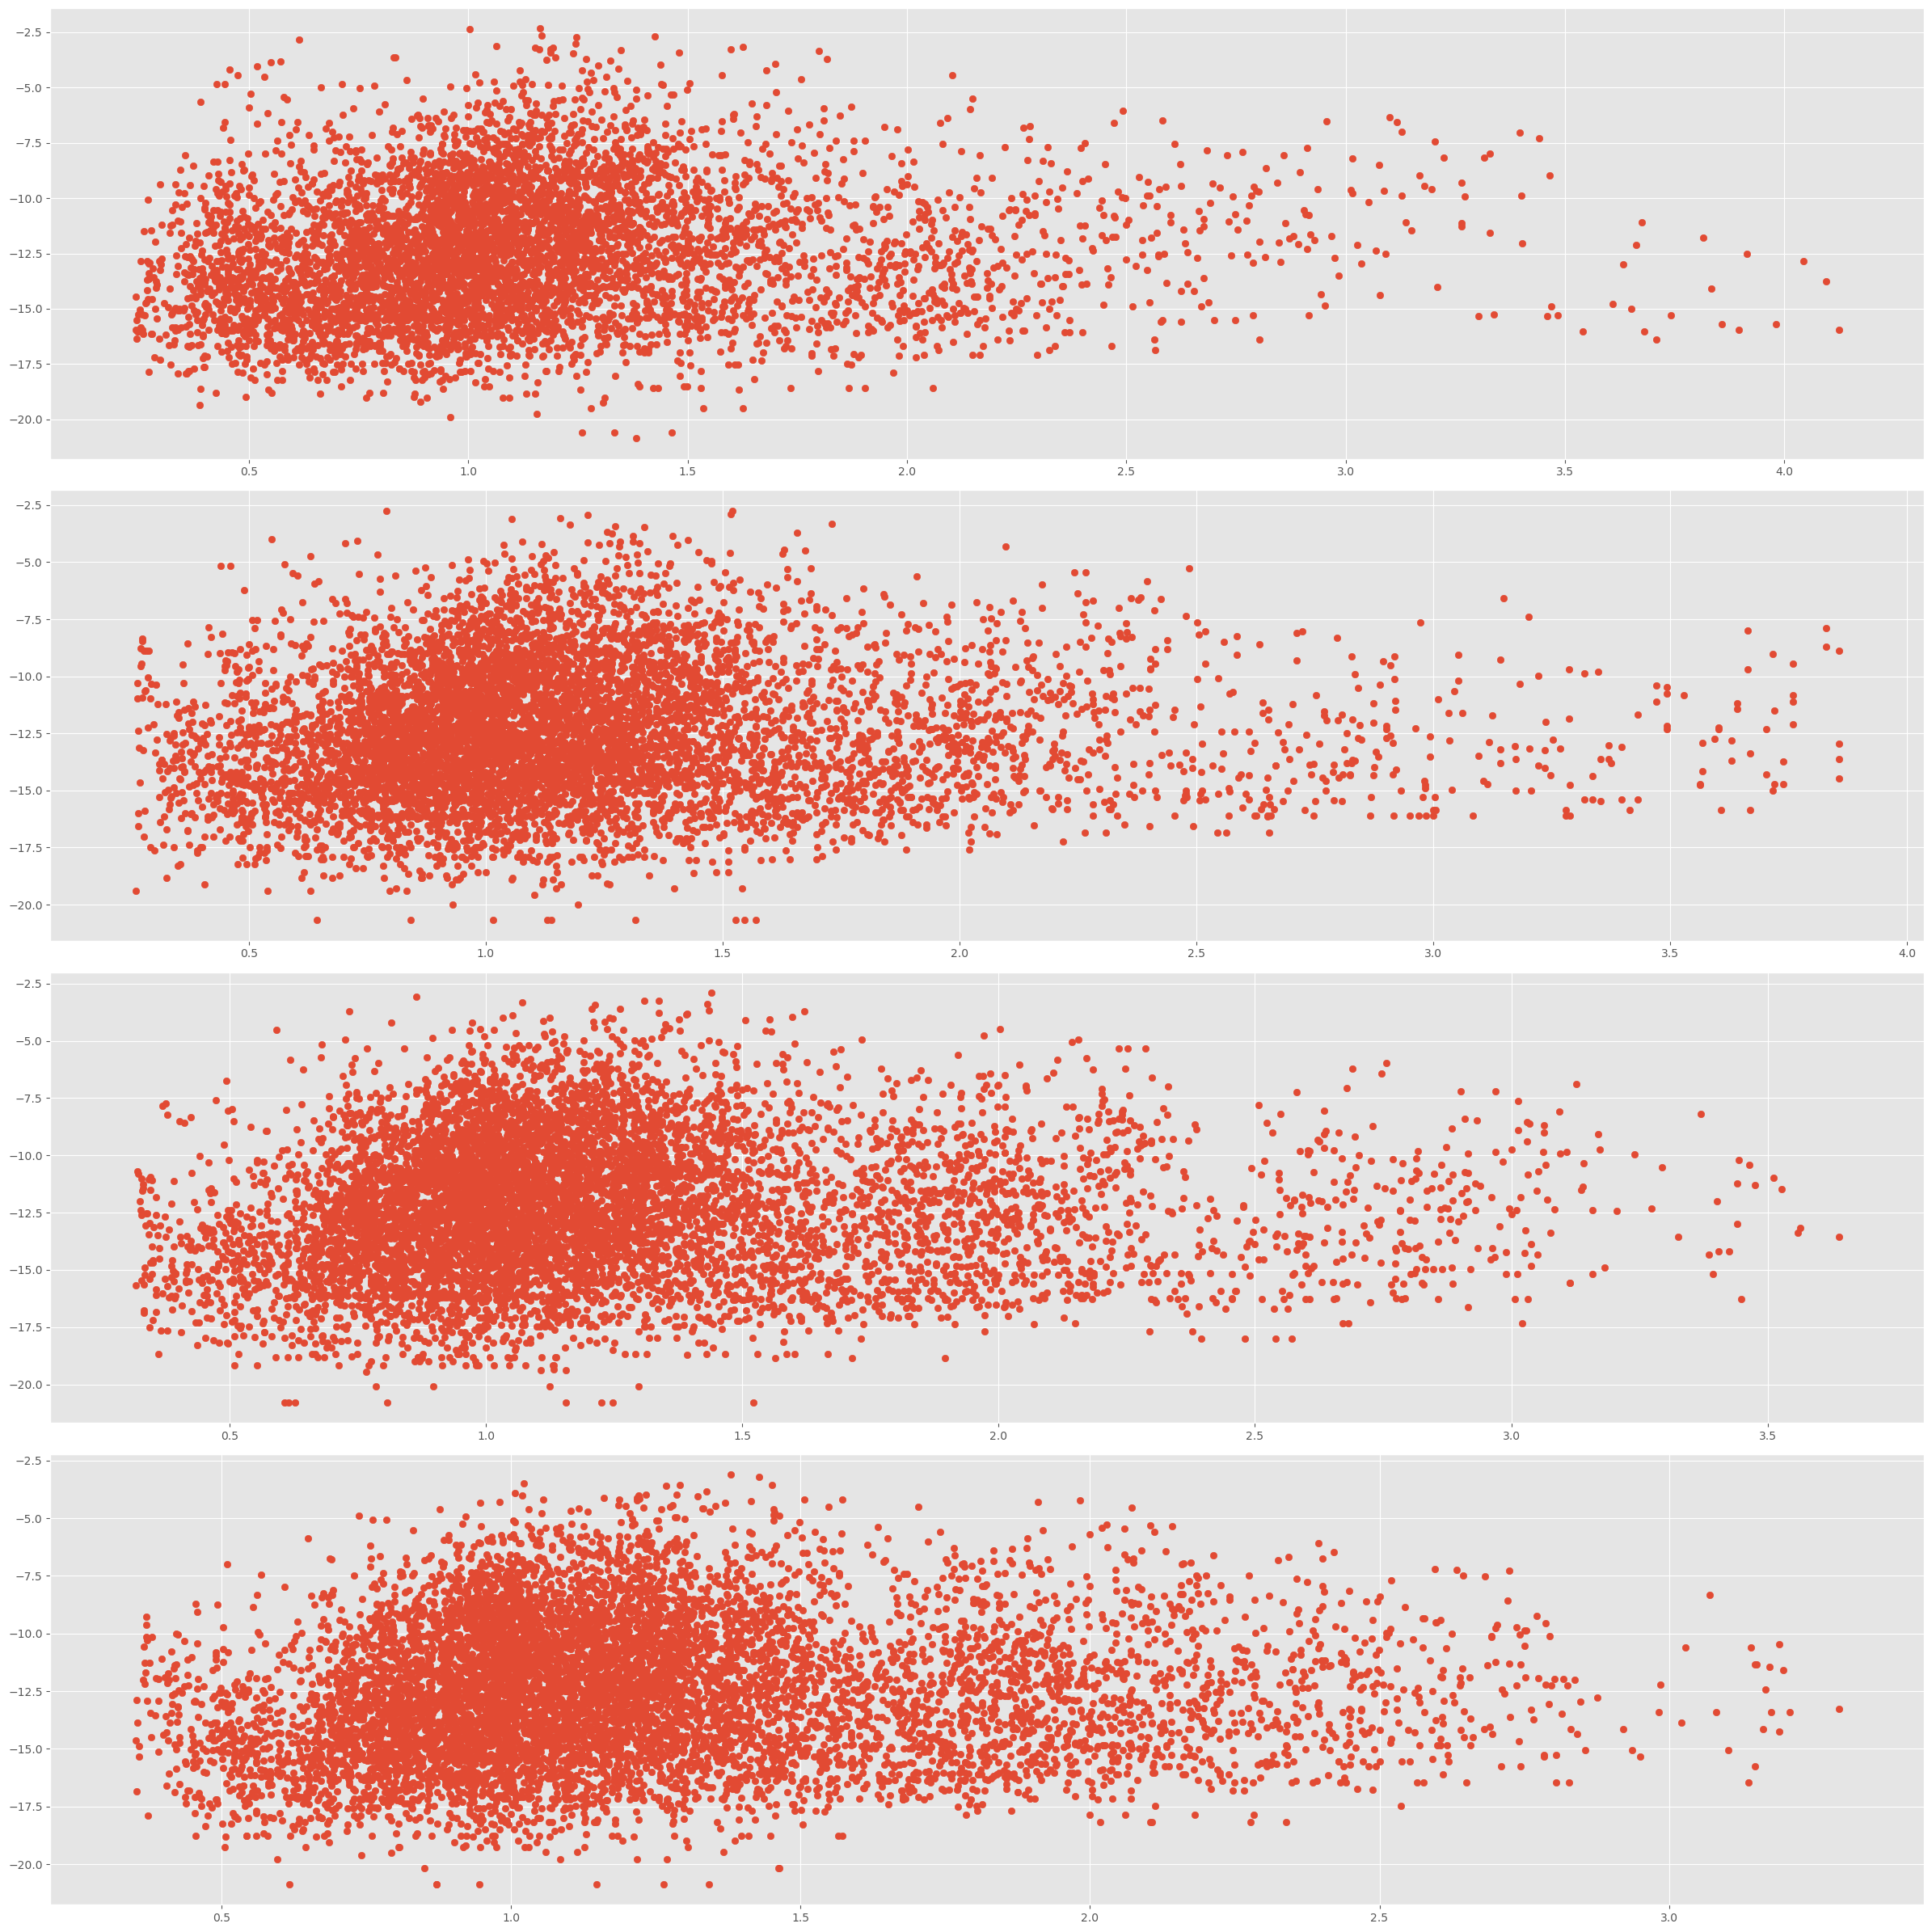

In [50]:
# Régression sur la variable IDH

df_90 = create_dico(pays_90, '90')
df_95 = create_dico(pays_95, '95')
df_00 = create_dico(pays_00, '00')
df_05 = create_dico(pays_05, '05')

X90_IDH, Y90_IDH = df_90[['ratio_IDH']].values , df_90[['ln_move']].values
X95_IDH, Y95_IDH = df_95[['ratio_IDH']].values , df_95[['ln_move']].values
X00_IDH, Y00_IDH = df_00[['ratio_IDH']].values , df_00[['ln_move']].values
X05_IDH, Y05_IDH = df_05[['ratio_IDH']].values , df_05[['ln_move']].values

model90 = sm.OLS(Y90_IDH, X90_IDH)
model95 = sm.OLS(Y95_IDH, X95_IDH)
model00 = sm.OLS(Y00_IDH, X00_IDH)
model05 = sm.OLS(Y05_IDH, X05_IDH)

results90 = model90.fit()
results95 = model95.fit()
results00 = model00.fit()
results05 = model05.fit()

for res in [results90, results95, results00, results05]:
    print(res.summary())

fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(24, 24),
                        layout="constrained")
for row, df in enumerate([df_90, df_95, df_00, df_05]):
        ax = axs[row]
        ax.scatter(df['ratio_IDH'], df['ln_move'])  

plt.tight_layout()  
plt.show()

100%|██████████| 197/197 [00:53<00:00,  3.68it/s]


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.769
Model:                            OLS   Adj. R-squared (uncentered):              0.769
Method:                 Least Squares   F-statistic:                          2.033e+04
Date:                Wed, 24 Apr 2024   Prob (F-statistic):                        0.00
Time:                        09:17:48   Log-Likelihood:                         -19797.
No. Observations:                6125   AIC:                                  3.960e+04
Df Residuals:                    6124   BIC:                                  3.960e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/tmp/ipykernel_292/493603905.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


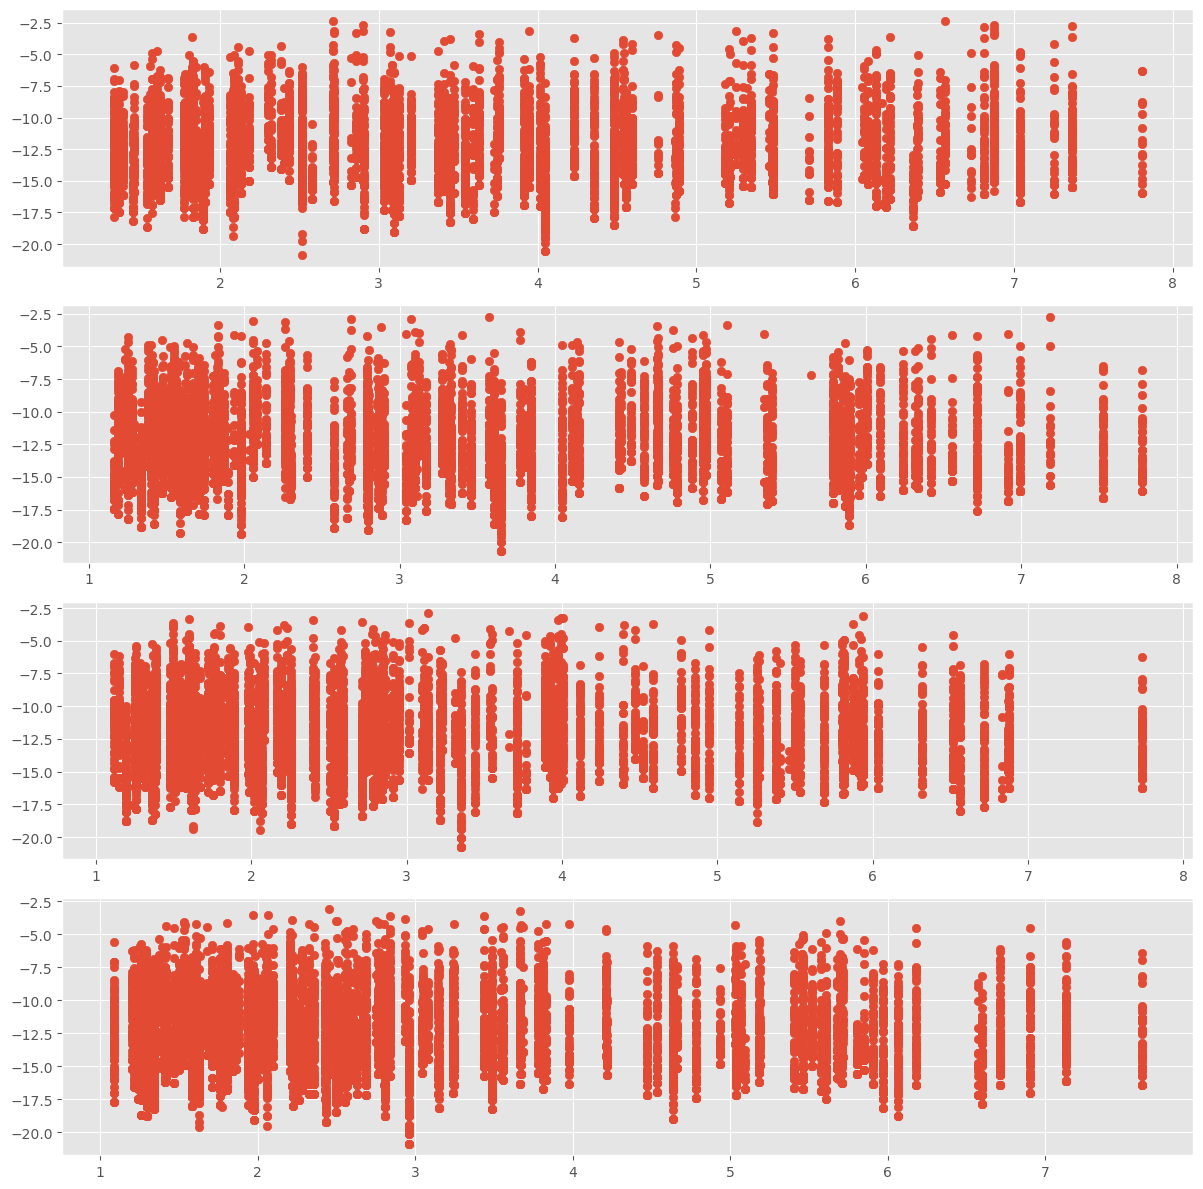

In [52]:
# Régression sur la variable FEC

df_90 = create_dico(pays_90, '90')
df_95 = create_dico(pays_95, '95')
df_00 = create_dico(pays_00, '00')
df_05 = create_dico(pays_05, '05')

X90_FEC, Y90_FEC = df_90[['delta_FEC']].values , df_90[['ln_move']].values
X95_FEC, Y95_FEC = df_95[['delta_FEC']].values , df_95[['ln_move']].values
X00_FEC, Y00_FEC = df_00[['delta_FEC']].values , df_00[['ln_move']].values
X05_FEC, Y05_FEC = df_05[['delta_FEC']].values , df_05[['ln_move']].values

model90 = sm.OLS(Y90_FEC, X90_FEC)
model95 = sm.OLS(Y95_FEC, X95_FEC)
model00 = sm.OLS(Y00_FEC, X00_FEC)
model05 = sm.OLS(Y05_FEC, X05_FEC)

results90 = model90.fit()
results95 = model95.fit()
results00 = model00.fit()
results05 = model05.fit()

for res in [results90, results95, results00, results05]:
    print(res.summary())

fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(12, 12),
                        layout="constrained")
for row, df in enumerate([df_90, df_95, df_00, df_05]):
        ax = axs[row]
        ax.scatter(df['delta_FEC'], df['ln_move'])  

plt.tight_layout()  
plt.show()

In [53]:
X90, Y90 = df_90[['ratio_PIB', 'ratio_IDH', 'ratio_CHO', 'delta_POPETR', 'delta_FEC']].values , df_90[['ln_move']].values
X95, Y95 = df_95[['ratio_PIB', 'ratio_IDH', 'ratio_CHO', 'delta_POPETR', 'delta_FEC']].values , df_95[['ln_move']].values
X00, Y00 = df_00[['ratio_PIB', 'ratio_IDH', 'ratio_CHO', 'delta_POPETR', 'delta_FEC']].values , df_00[['ln_move']].values
X05, Y05 = df_05[['ratio_PIB', 'ratio_IDH', 'ratio_CHO', 'delta_POPETR', 'delta_FEC']].values , df_05[['ln_move']].values

X90 = sm.add_constant(X90)
X95 = sm.add_constant(X95)
X00 = sm.add_constant(X00)
X05 = sm.add_constant(X05)


model90 = sm.OLS(Y90, X90)
model95 = sm.OLS(Y95, X95)
model00 = sm.OLS(Y00, X00)
model05 = sm.OLS(Y05, X05)

results90 = model90.fit()
results95 = model95.fit()
results00 = model00.fit()
results05 = model05.fit()

/tmp/ipykernel_292/1077764027.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


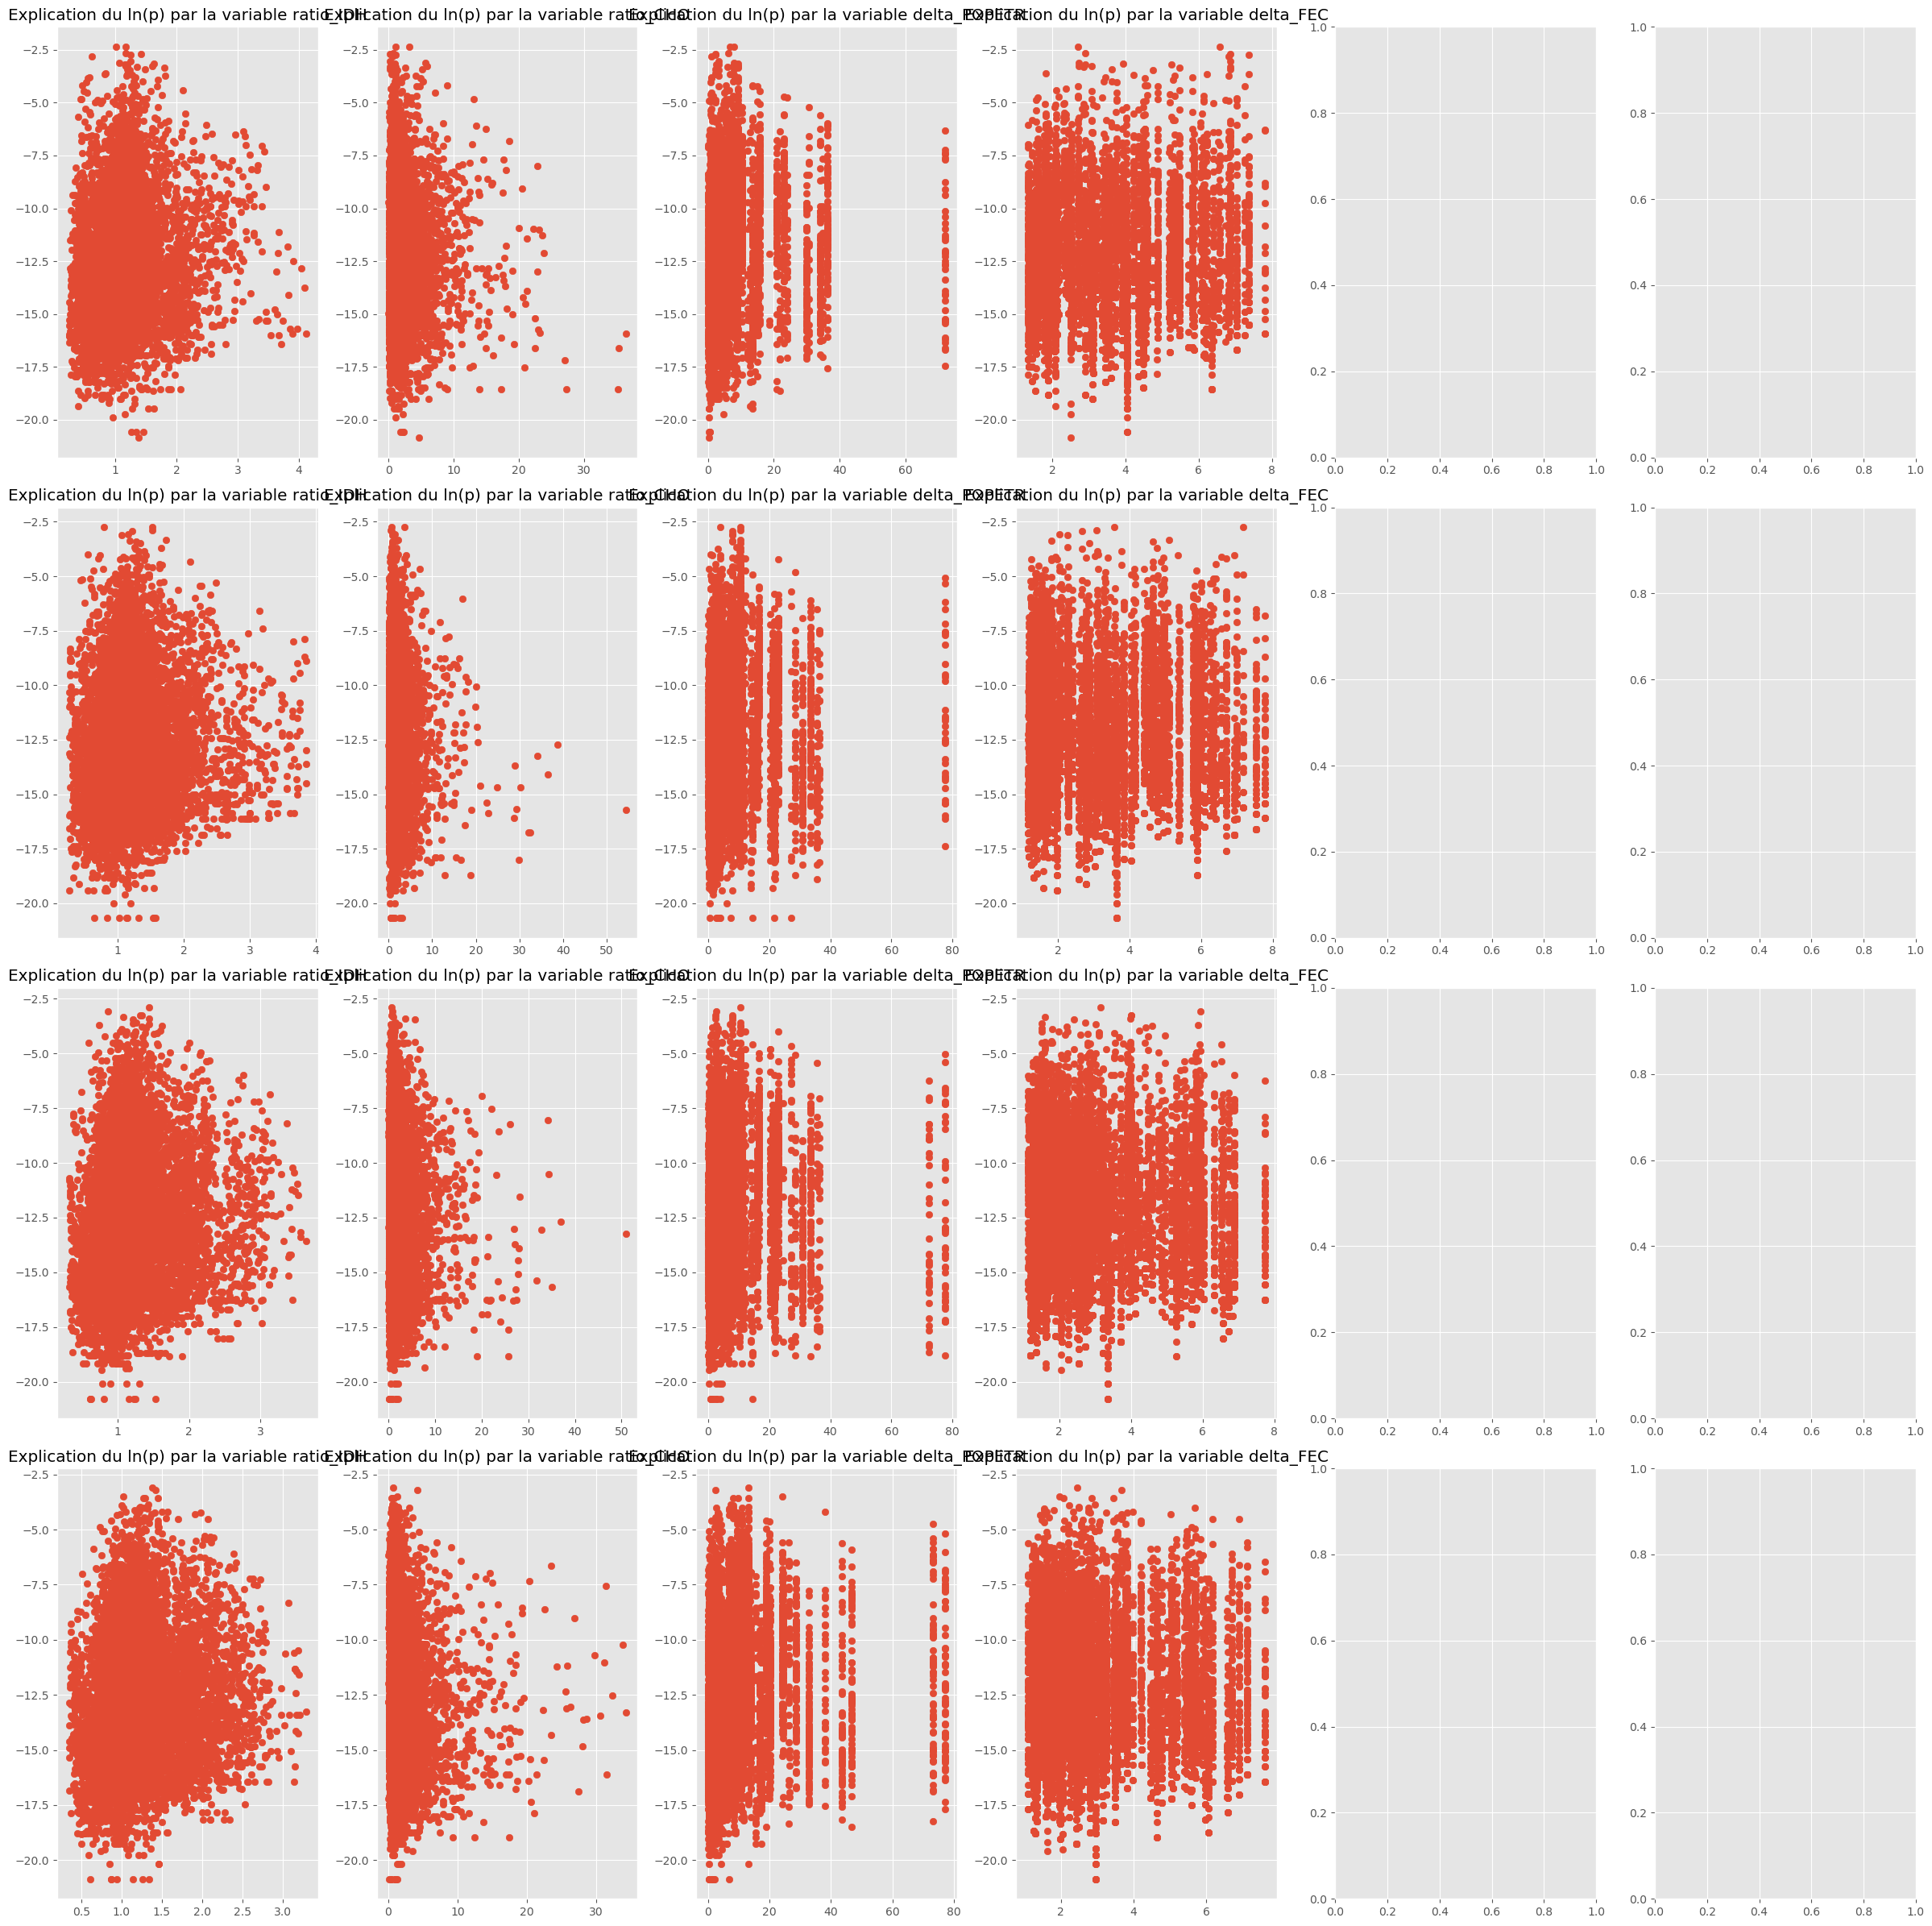

In [55]:
fig, axs = plt.subplots(ncols=6, nrows=4, figsize=(24, 24),
                        layout="constrained")
for row, df in enumerate([df_90, df_95, df_00, df_05]):
    for col, column in enumerate(['ratio_PIB', 'ratio_IDH', 'ratio_CHO', 'delta_POPETR', 'delta_FEC']):
        ax = axs[row, col]
        ax.scatter(df[column], df['ln_move'])  
        #ax.xaxis(f'{column}')
        #ax.yaxis('ln_move')
        ax.set_title(f'Explication du ln(p) par la variable {column}')

plt.tight_layout()  
plt.show()

In [56]:
for res in [results90, results95, results00, results05]:
    print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     48.00
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           8.39e-40
Time:                        09:18:49   Log-Likelihood:                -15197.
No. Observations:                6125   AIC:                         3.040e+04
Df Residuals:                    6120   BIC:                         3.044e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.1329      0.099   -132.115      0.0